PARCIAL III CLASE DEL 14 DE MAYO DE 2024

In [10]:
#IMPORTAR LIBRERIAS Y MODELO DE ARBOL DE DECISION
import pandas as pd
from sklearn import tree

In [11]:
data = pd.read_csv("/content/drugs200.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drugs200.csv'

In [ ]:
# reviso las cols no numéricas
print("Sex:", data.Sex.unique())
print("BP:", data.BP.unique())
print("Cholesterol:", data.Cholesterol.unique())
print("Drug", data.Drug.unique())

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
# codificación de variables
sex_labels = {'F': 0, 'M': 1}
BP_labels = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2} # notar cómo respeto el orden
cho_labels = {'NORMAL': 0, 'HIGH': 1}
drug_labels = dict(zip(data.Drug.unique(), range(data.Drug.nunique())))

drug_labels

{'drugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4}

In [ ]:
# codifico
data.Drug = data.Drug.map(drug_labels)
data.Sex = data.Sex.map(sex_labels)
data.BP = data.BP.map(BP_labels)
data.Cholesterol = data.Cholesterol.map(cho_labels)

In [3]:
data.head()

outlook temperature humidity  windy play
0     sunny         hot     high  False   no
1     sunny         hot     high   True   no
2  overcast         hot     high  False  yes
3     rainy        mild     high  False  yes
4     rainy        cool   normal  False  yes

In [4]:
arbol = tree.DecisionTreeClassifier()
arbol

DecisionTreeClassifier()

In [6]:
X = data.drop("Drug", axis=1)
X.head()

temperature humidity  windy play
0         hot     high  False   no
1         hot     high   True   no
2         hot     high  False  yes
3        mild     high  False  yes
4        cool   normal  False  yes

In [7]:
y = data["Drug"]
y.head()

0       sunny
1       sunny
2    overcast
3       rainy
4       rainy
Name: outlook, dtype: object

In [8]:
# dividimos los datos usando la función de sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
arbol.fit(X_train, y_train)

ValueError: could not convert string to float: 'cool'

In [ ]:
!pip install graphviz

In [ ]:
arbol.score(X_test, y_test)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

arboles = RandomForestClassifier(n_estimators=500, max_depth=3, n_jobs=-1)
arboles.fit(X_train, y_train)

arboles.score(X_test, y_test)

0.9

In [ ]:
arboles.feature_importances_

array([0.11136048, 0.01512711, 0.22128354, 0.03006802, 0.62216084])

In [ ]:
arbol.feature_importances_

array([0.1481685 , 0.        , 0.26751199, 0.10820914, 0.47611037])

In [ ]:
arboles.estimators_[:10]

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=194640721),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2088630283),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=443208663),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1882206775),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=407104594),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1045105975),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1547800271),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1851222492),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=182935441),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1726209234)]

In [ ]:
#CLUSTERIZACION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Wholesale customers data (1).csv')
data

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

In [ ]:
from sklearn.preprocessing import normalize

data_norm = normalize (data)
data_norm = pd.DataFrame (data_norm, columns = data.columns) #Creamos un dataframe solo para visualizacion
data_norm

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1    0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2    0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3    0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4    0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   
..        ...       ...       ...       ...       ...       ...   
435  0.000026  0.000078  0.776890  0.315197  0.419191  0.343549   
436  0.000025  0.000076  0.990872  0.036146  0.019298  0.113919   
437  0.000050  0.000075  0.364462  0.388465  0.758545  0.010961   
438  0.000091  0.000273  0.937737  0.180530  0.203404  0.094594   
439  0.000241  0.000724  0.672296  0.409601  0.605476  0.015680   

     Detergents_Paper  Delicassen  
0            0.149505    0.074809  
1            0.206342    0.111286  
2            0.219467    0.489619  
3            0.032749    0.115494  
4            0.070358    0.205294  
..                ...         ...  
435          0.004760    0.057646  
436          0.002349    0.059258  
437          0.372237    0.046827  
438          0.015310    0.193653  
439          0.115065    0.012544  

[440 rows x 8 columns]

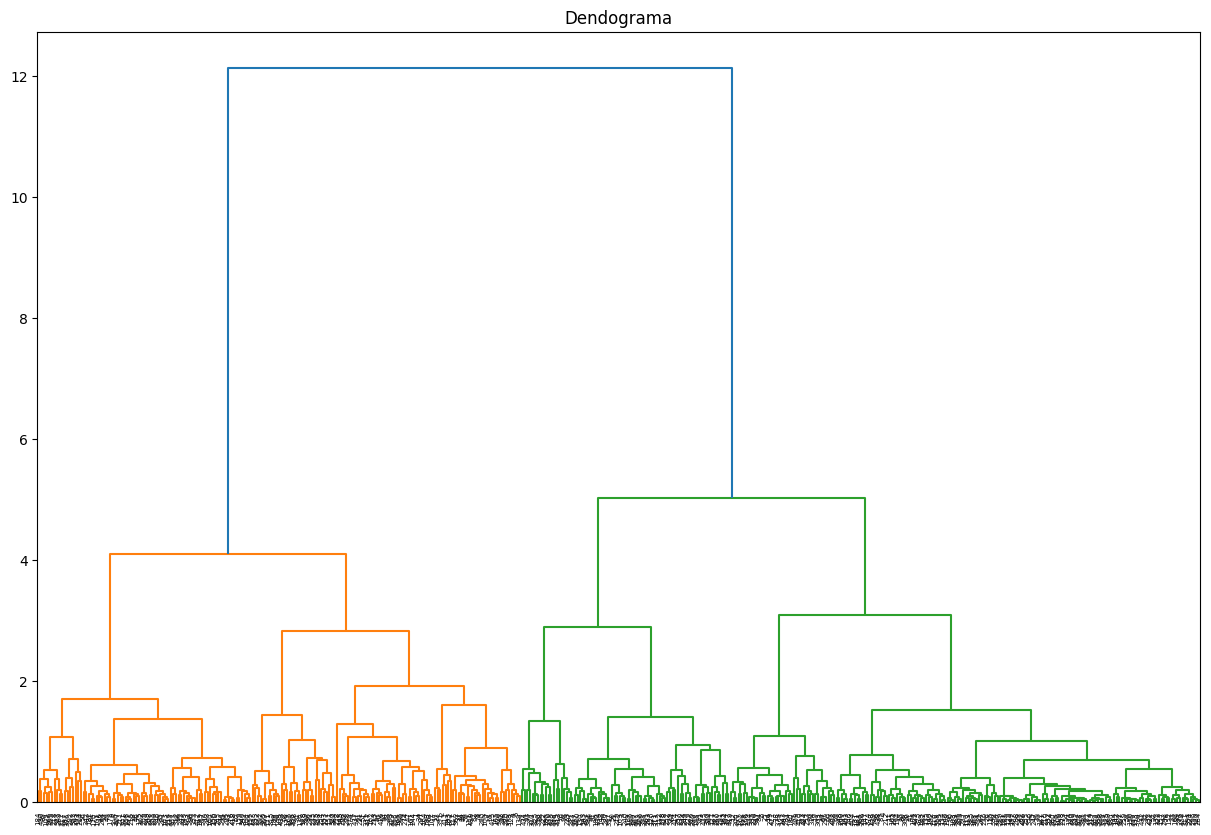

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_norm, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean', linkage = 'ward')

In [ ]:
clusters.fit_predict(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [ ]:
data['Cluster'] = clusters.labels_
data

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster  
0          1338        1  
1          1776        1  
2          7844        1  
3          1788        2  
4          5185        0  
..          ...      ...  
435        2204        2  
436        2346        0  
437        1867        1  
438        2125        0  
439          52        1  

[440 rows x 9 columns]

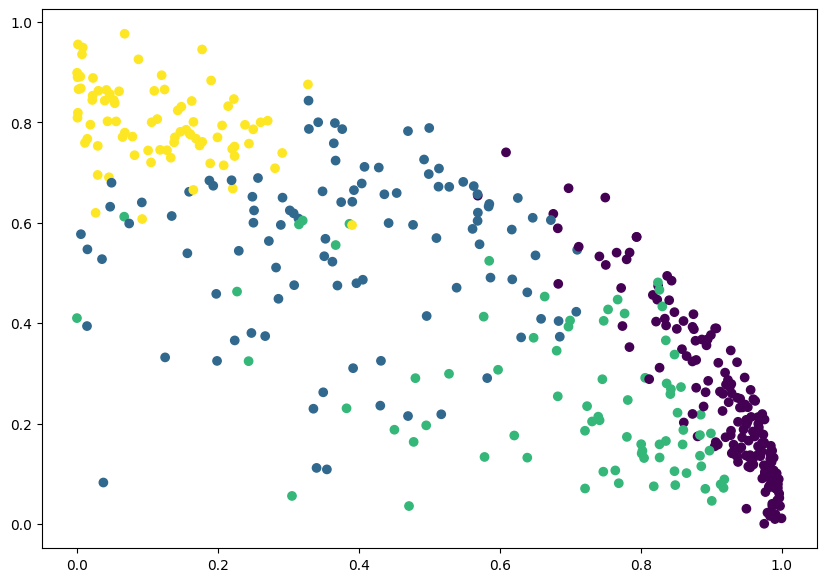

In [ ]:
#VISUALIZACION DE LOS DATOS
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Fresh'], data_norm['Grocery'], c=clusters.labels_)

In [ ]:
from sklearn import tree
model_params={
        'decision tree': {
        'model':tree.DecisionTreeClassifier(),
        'params':{
            'max_depth':[5, 10],
            'min_samples_split':[10,50],
            'min_samples_leaf':[10,50],
            'criterion':['gini','entropy']
        }
    }
}

In [ ]:
inputs=data_norm
target=np.array(data['Cluster'])

In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

train inputs (352, 8)
train targets (352,)
test inputs (88, 8)
test targtet (88,)


In [ ]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)

    clf.fit(train_inputs, train_target)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df_score=pd.DataFrame(score,columns=['model','best_score','best_params'])
df_score

model  best_score  \
0  decision tree    0.923421   

                                         best_params  
0  {'criterion': 'entropy', 'max_depth': 5, 'min_...

In [ ]:
Tree=tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10, min_samples_split=101).fit(train_inputs, train_target)

In [ ]:
from sklearn.metrics import accuracy_score
pred = Tree.predict(test_inputs)
accuracy_score(test_target, pred)

0.8522727272727273

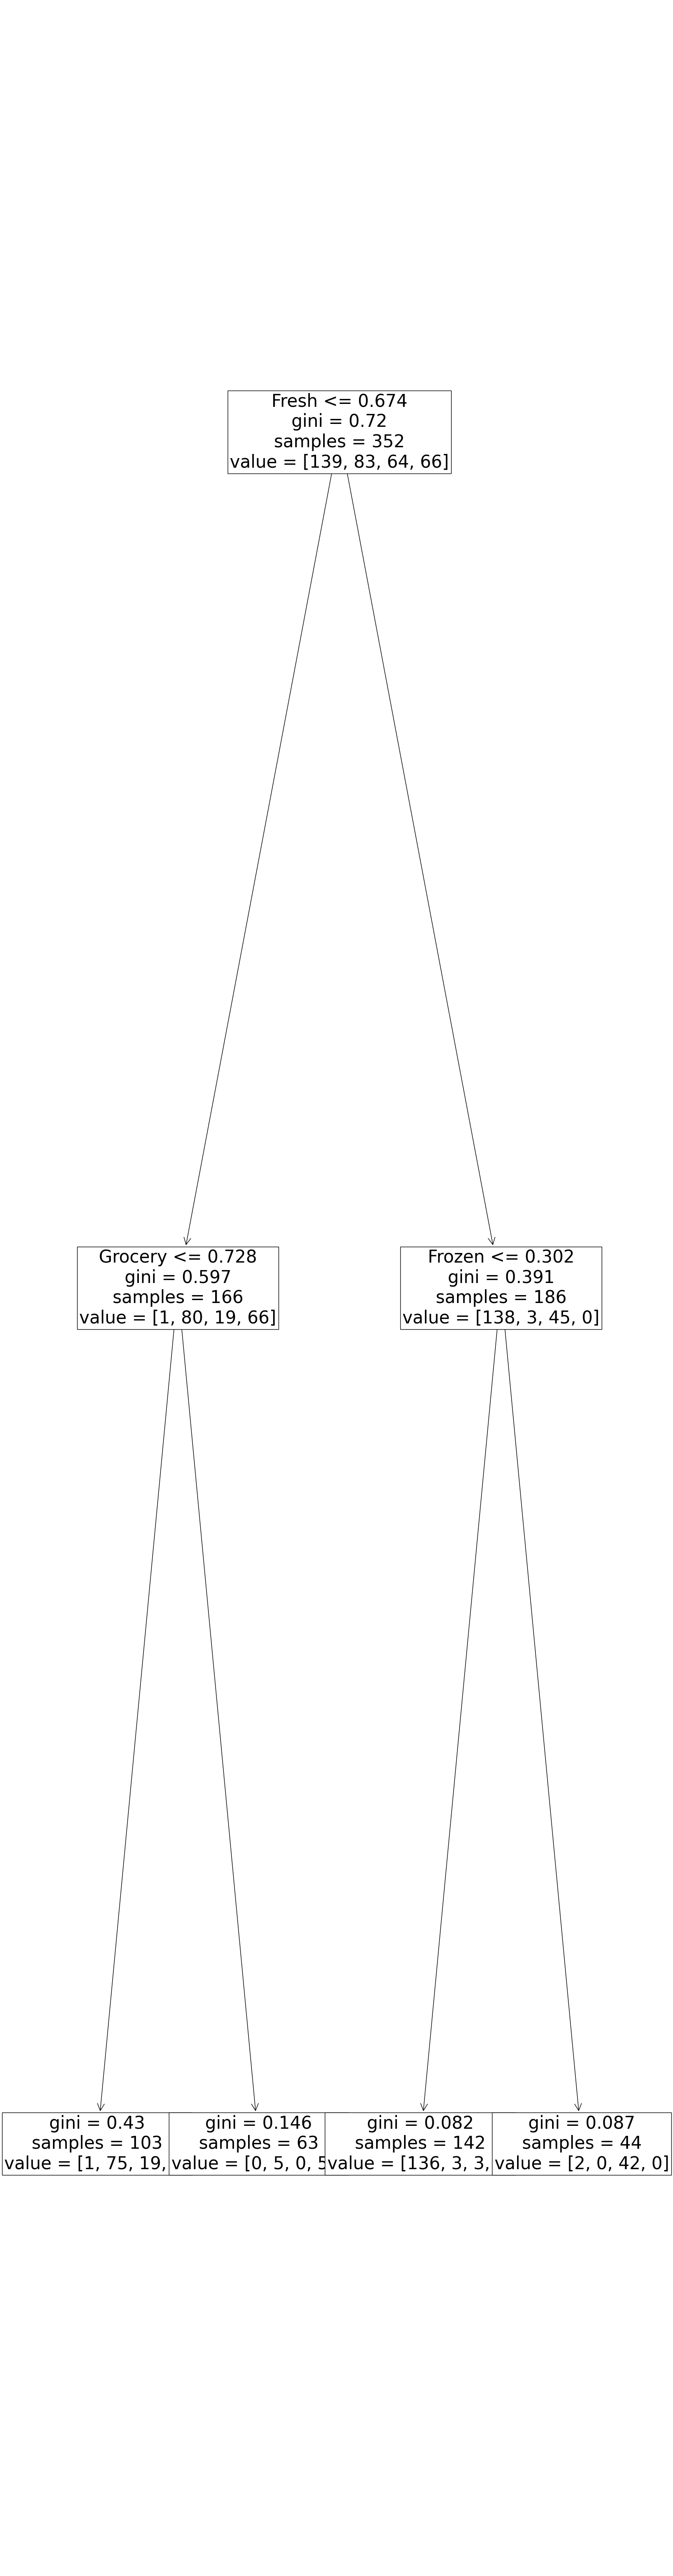

In [ ]:
plt.figure(figsize=(20, 80))
tree.plot_tree(Tree, fontsize= 30, feature_names=list(inputs.columns))
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [ ]:
x

array([[ -3.38426057,   5.22173974],
       [ -1.83623836,  -7.73538367],
       [ -7.45617621,   6.19887436],
       [ -1.78504307,   1.60974874],
       [-10.1249098 ,   6.1338052 ],
       [  1.0146433 ,   4.0453507 ],
       [ -0.70092735,  -6.98196818],
       [  8.99757441,  -2.30228718],
       [ -7.9192539 ,   5.72225675],
       [  1.9445622 ,  -7.43742299],
       [ -0.93442649,  -7.78820426],
       [ 11.48819121,   1.33719026],
       [ -2.86067816, -11.24623446],
       [ -7.90577233,   4.84553865],
       [ -2.24228315,   4.38550238],
       [  0.56928691, -10.0571088 ],
       [  0.6237701 ,  -6.12033956],
       [  8.32594634,   0.04535295],
       [ -2.11937574, -10.1833945 ],
       [ -6.70767333,   5.26896209],
       [ -2.52855036,   5.03085908],
       [ -8.19937429,   4.07185131],
       [ -8.86097416,   7.62744807],
       [  0.25552915, -12.26658908],
       [  7.09274235,   1.13571881],
       [ -8.51922024,   4.14769715],
       [  9.58876813,  -2.81738008],
 

In [ ]:
y

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

In [ ]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1],
    'y':y

})

In [ ]:
df_blobls

x1        x2  y
0   -3.384261  5.221740  1
1   -1.836238 -7.735384  3
2   -7.456176  6.198874  0
3   -1.785043  1.609749  1
4  -10.124910  6.133805  0
..        ...       ... ..
95   7.072755 -0.259937  2
96  -2.626873 -7.228570  3
97  -1.521099  1.802284  1
98  -9.216388  6.670846  0
99  -1.681382  6.414631  1

[100 rows x 3 columns]

In [ ]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

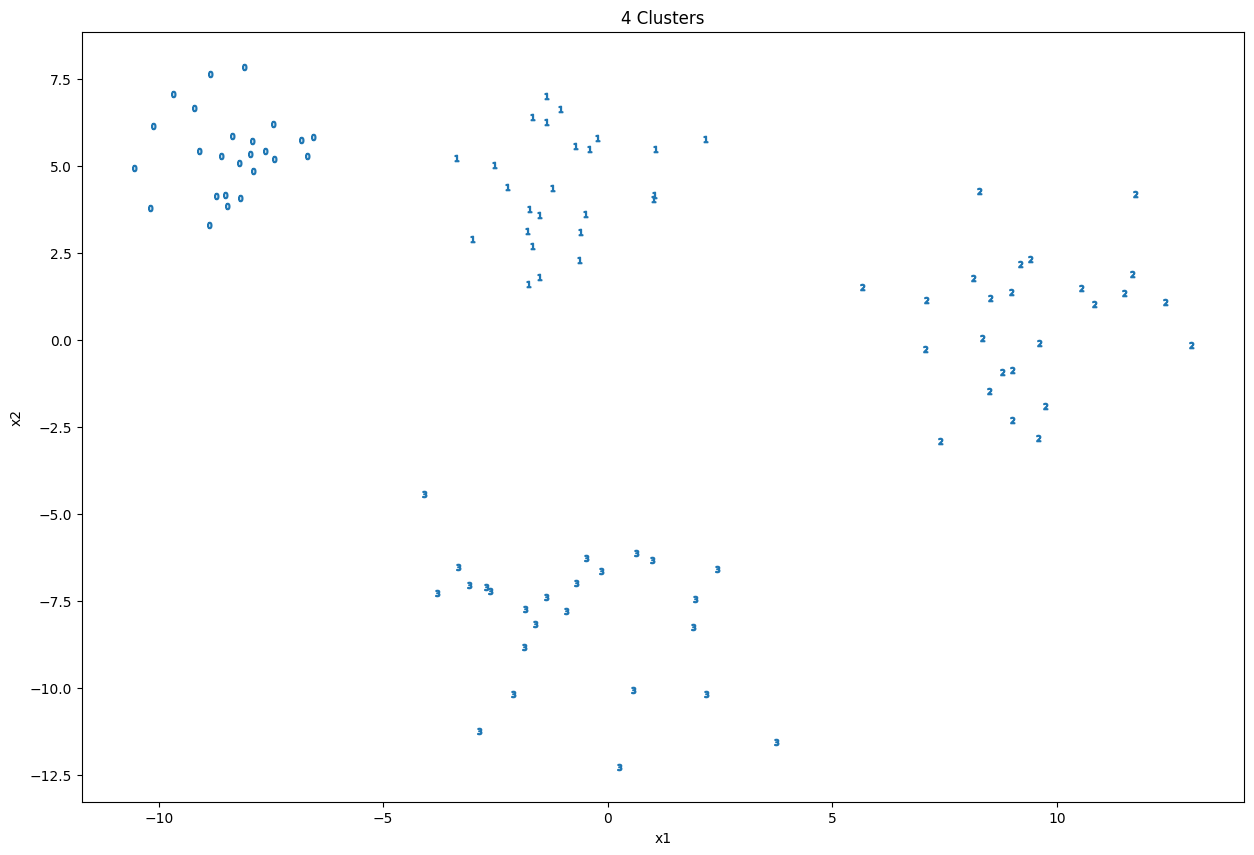

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [ ]:
y_pred = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_pred

array([0, 3, 4, 0, 4, 0, 3, 2, 4, 1, 3, 2, 3, 4, 0, 1, 1, 2, 3, 4, 0, 4,
       4, 1, 2, 4, 2, 2, 1, 0, 3, 3, 0, 3, 1, 4, 2, 4, 0, 4, 3, 0, 0, 2,
       0, 2, 4, 4, 2, 4, 2, 1, 2, 3, 0, 4, 0, 3, 0, 0, 0, 3, 0, 2, 4, 2,
       4, 2, 2, 0, 4, 2, 4, 4, 2, 2, 2, 2, 3, 0, 0, 0, 4, 3, 2, 3, 2, 4,
       4, 0, 1, 0, 4, 1, 2, 2, 3, 0, 4, 0], dtype=int32)

Text(0.5, 1.0, 'Kmeans 5 Clusters')

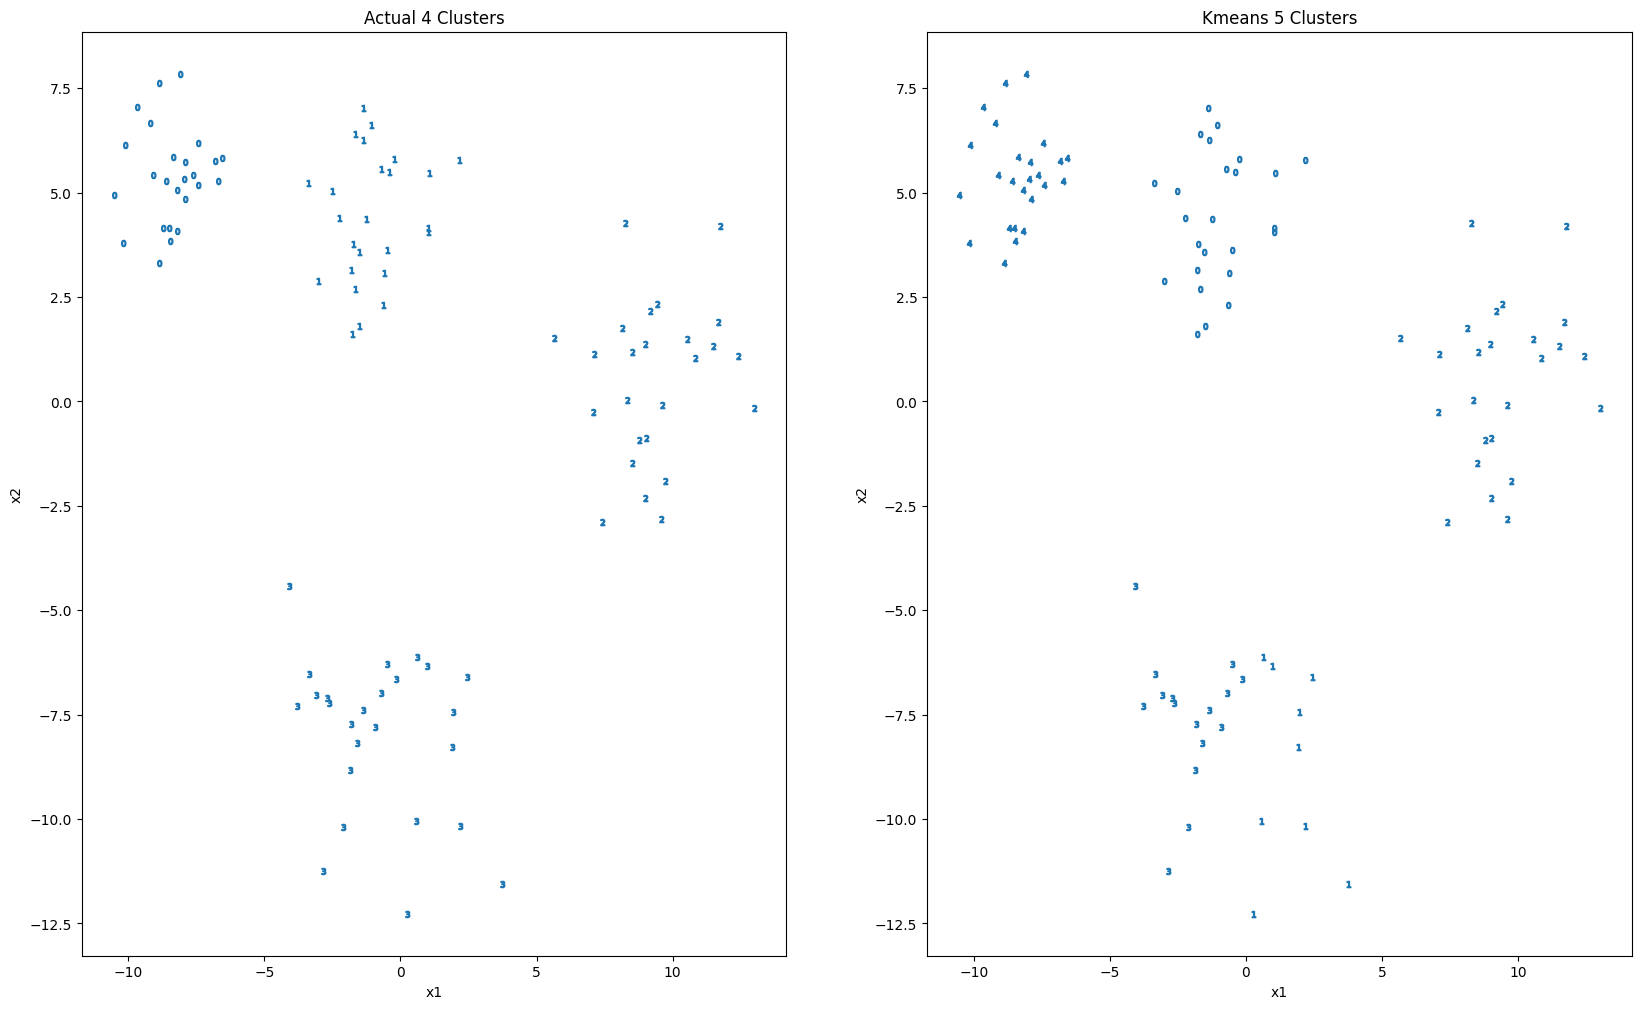

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates['new_template'] = go.layout.Template()
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}
pio.templates['new_template']['layout']['paper_bgcolor'] = 'black'
pio.templates['new_template']['layout']['plot_bgcolor'] = 'black'
pio.templates['new_template']['layout']['xaxis'] = {'title_standoff': 10, 'linecolor': 'black', 'mirror': True, 'gridcolor': '#EEEEEE'}
pio.templates['new_template']['layout']['yaxis'] = {'title_standoff': 10, 'linecolor': 'black', 'mirror': True, 'gridcolor': '#EEEEEE'}
pio.templates['new_template']['layout']['legend_bgcolor'] = 'rgb(117, 112, 179)'
pio.templates['new_template']['layout']['height'] = 700
pio.templates['new_template']['layout']['width'] = 1000
pio.templates['new_template']['layout']['autosize'] = False

pio.templates.default = 'new_template'

In [ ]:
import plotly.graph_objects as go
import plotly.express as px


def graficar_clusters_plotly(x,y, color, show=True):
    global fig1
    fig1 = go.Figure()
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        fig1.add_traces(data=px.scatter(x=x[y==_][:,0], y=x[y==_][:,1],opacity=0.8, color_discrete_sequence=[color[_]]).data)

    fig1.update_layout(showlegend=True)
    fig1.show()

In [ ]:
#NUEVA CLUSTERIZACION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
!pip install yellowbrick

In [ ]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [ ]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

In [ ]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

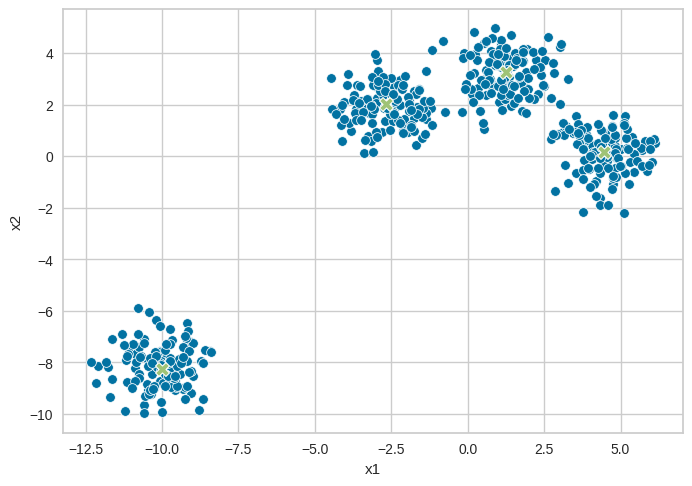

In [ ]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]

    }
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


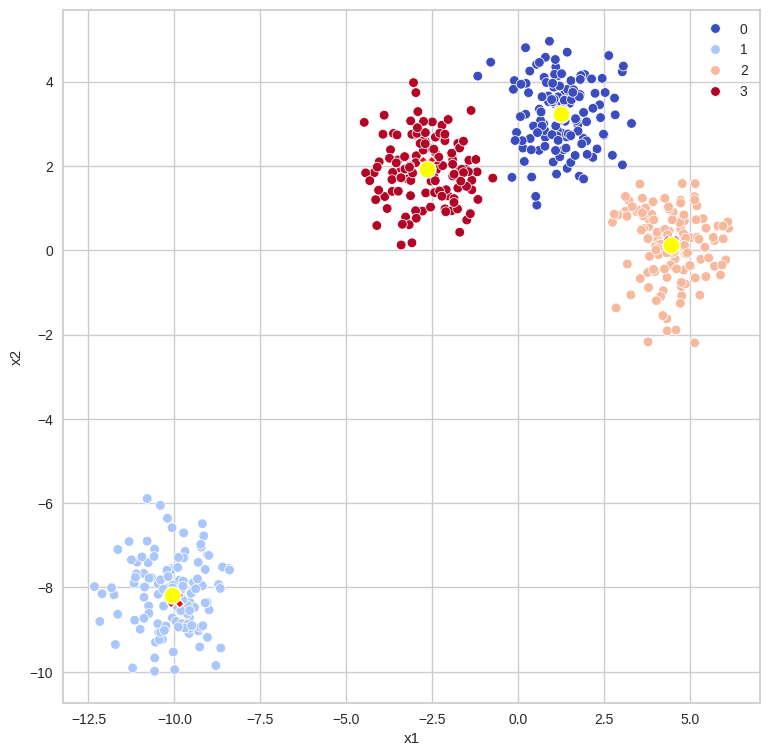

In [ ]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()

In [ ]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


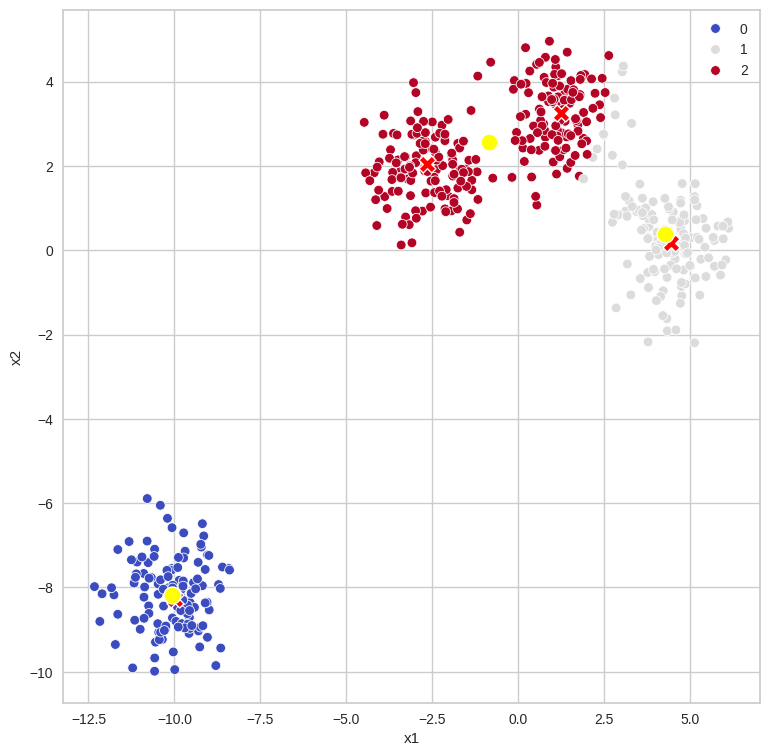

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


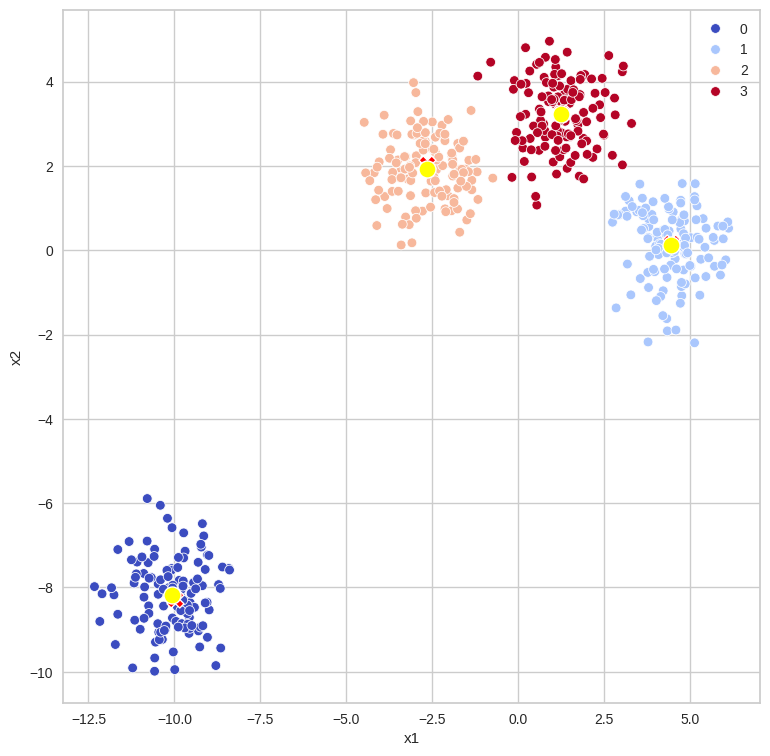

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


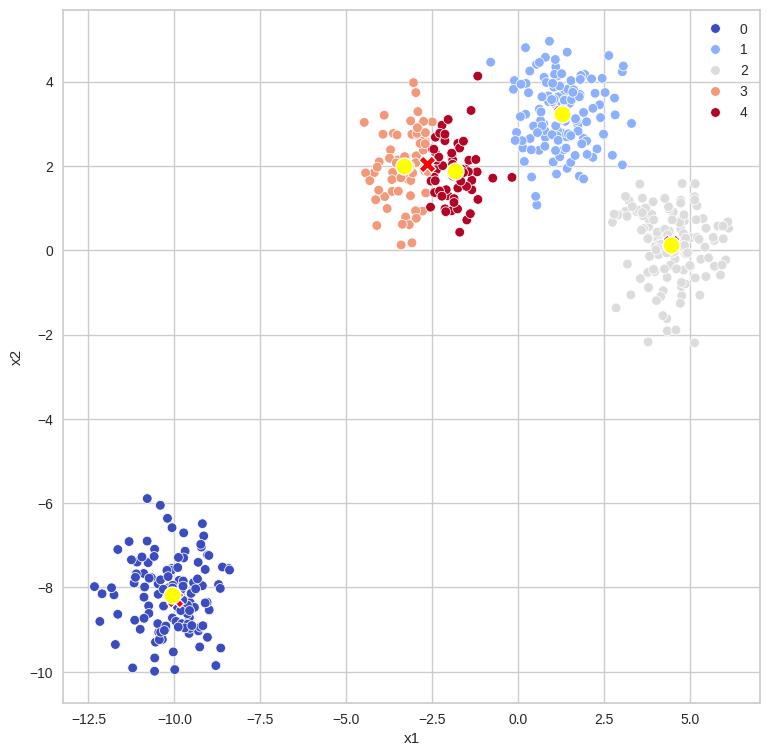

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


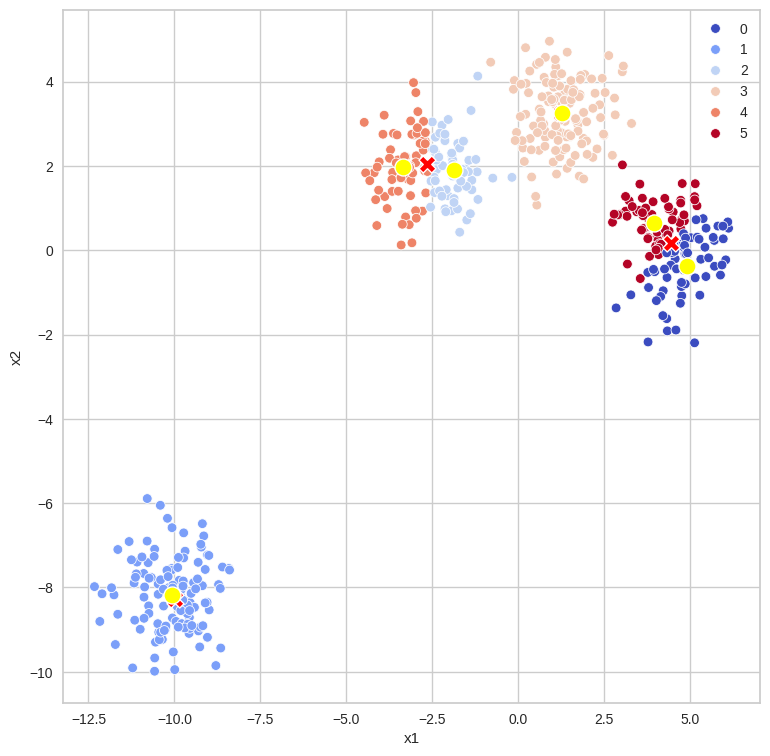

In [ ]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

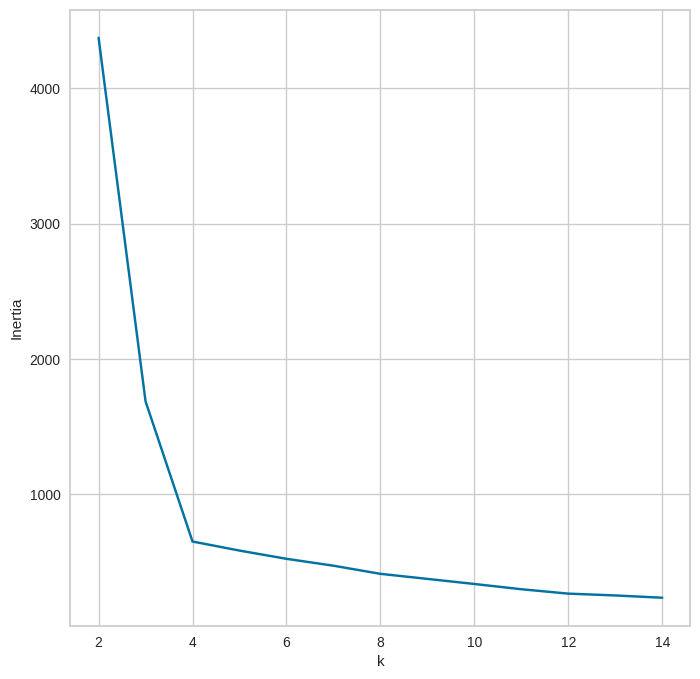

In [ ]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


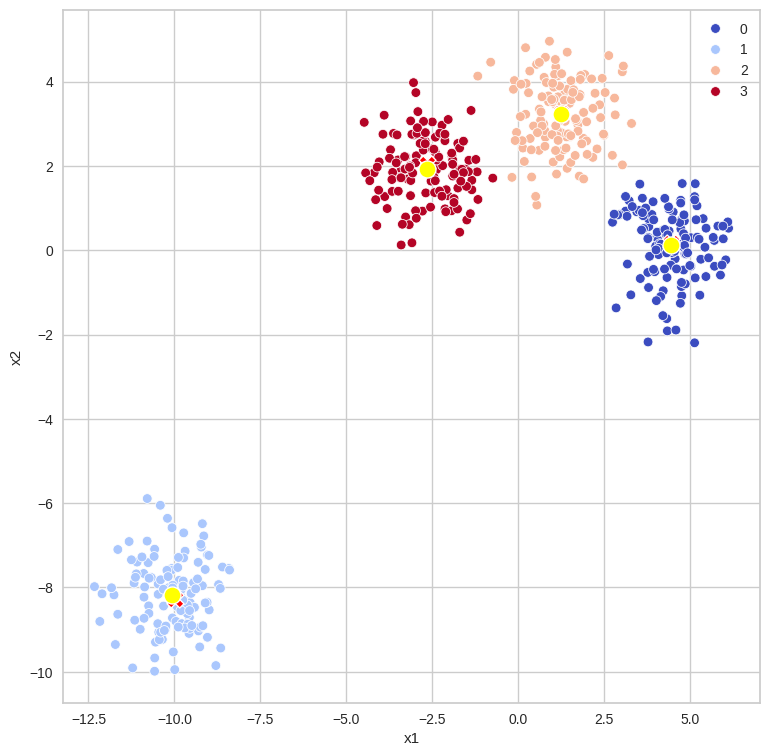

In [ ]:
vis_cluster(4)

In [ ]:
#HIERARCHICAL O JERARQUICO CLUSTER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

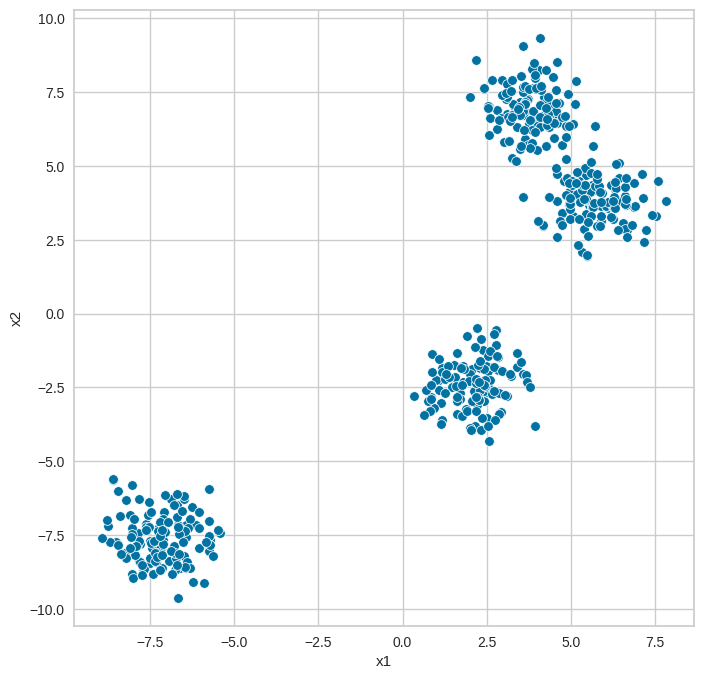

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

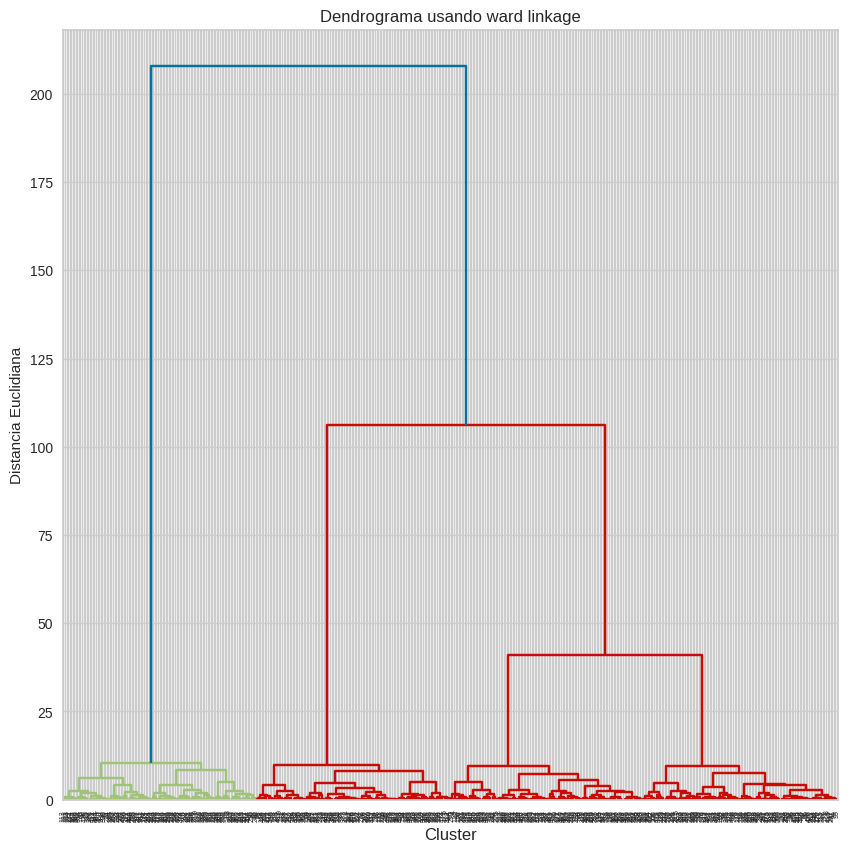

In [ ]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
df_blobs['cluster'] = y_hc

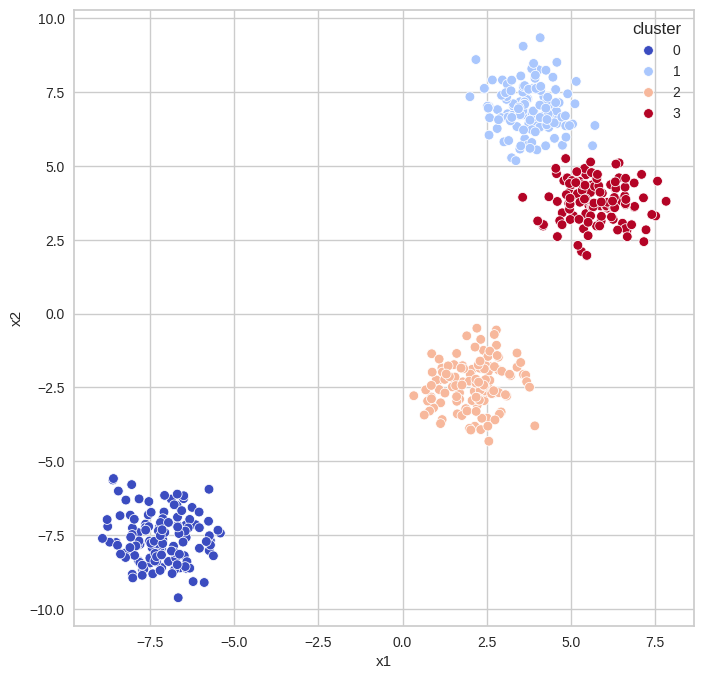

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()

In [ ]:
silhouette_score(X,y_hc)

0.7379198900665178

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7672673649370734


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7379198900665178


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5947673395193468


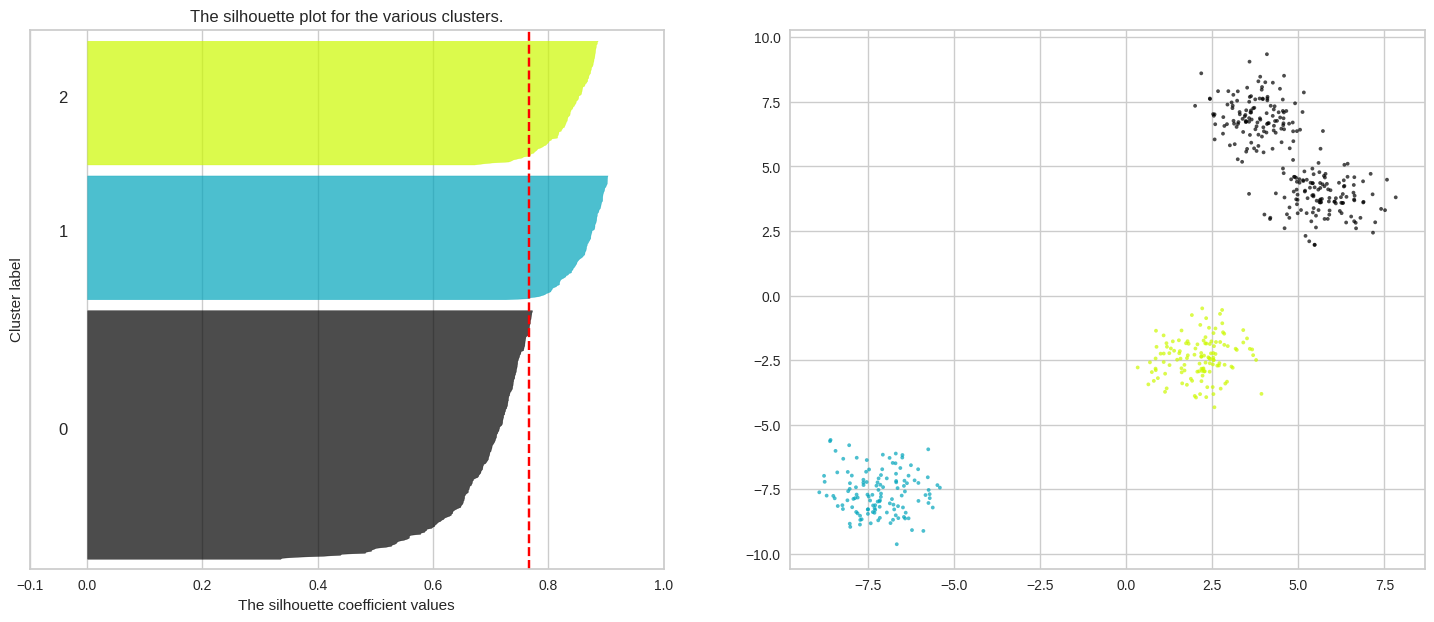

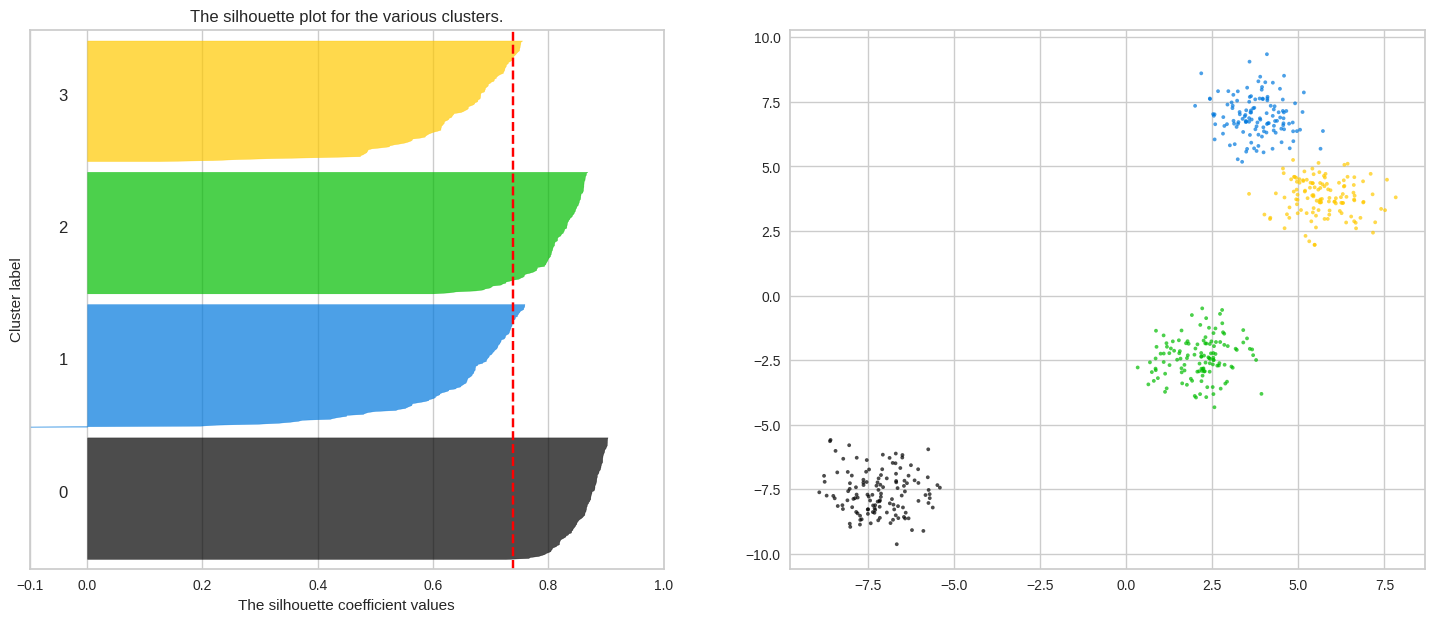

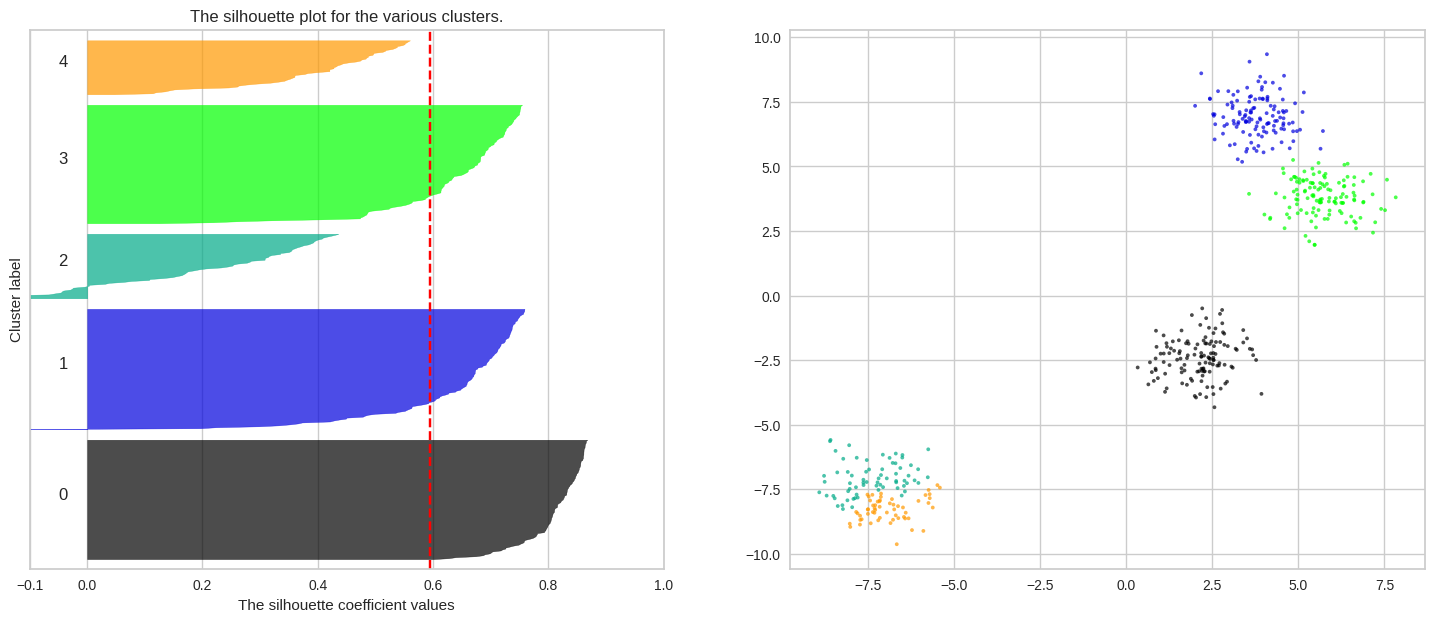

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()

In [ ]:
#DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

In [ ]:
X_m ,y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
    )

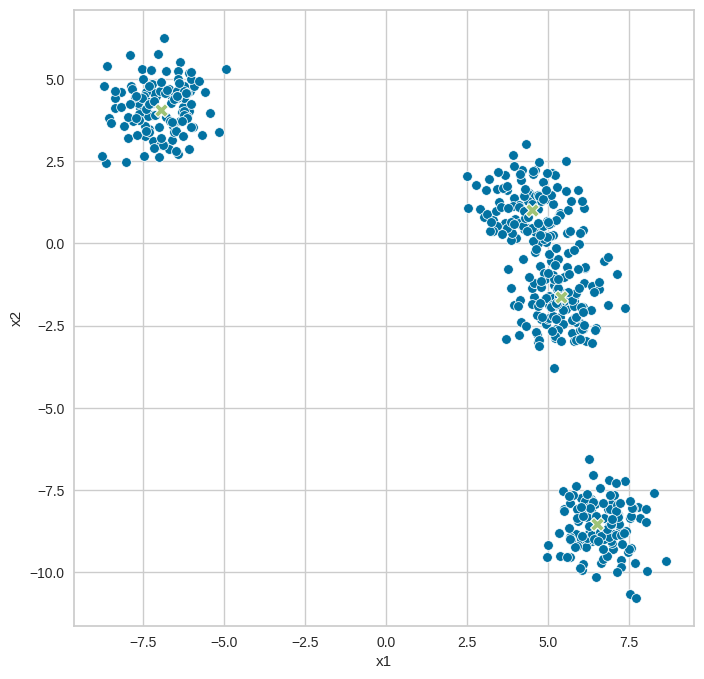

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

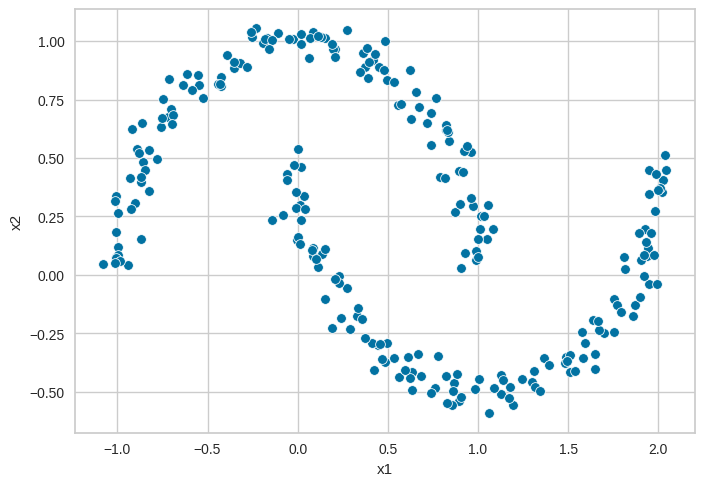

In [ ]:
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

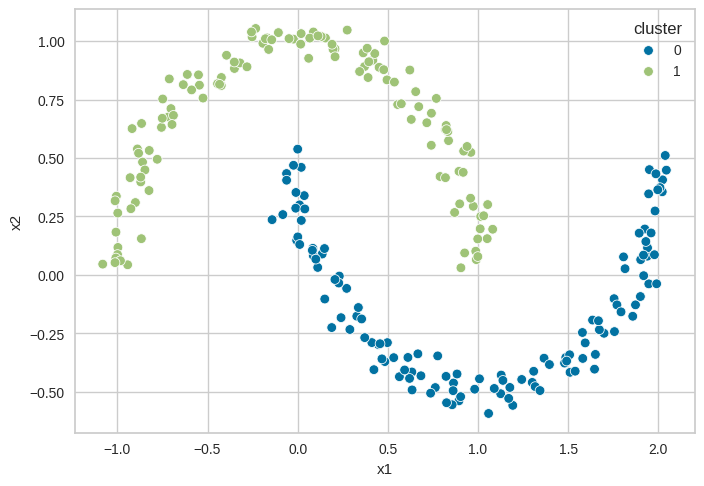

In [ ]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1',y='x2', hue='cluster')
plt.show()

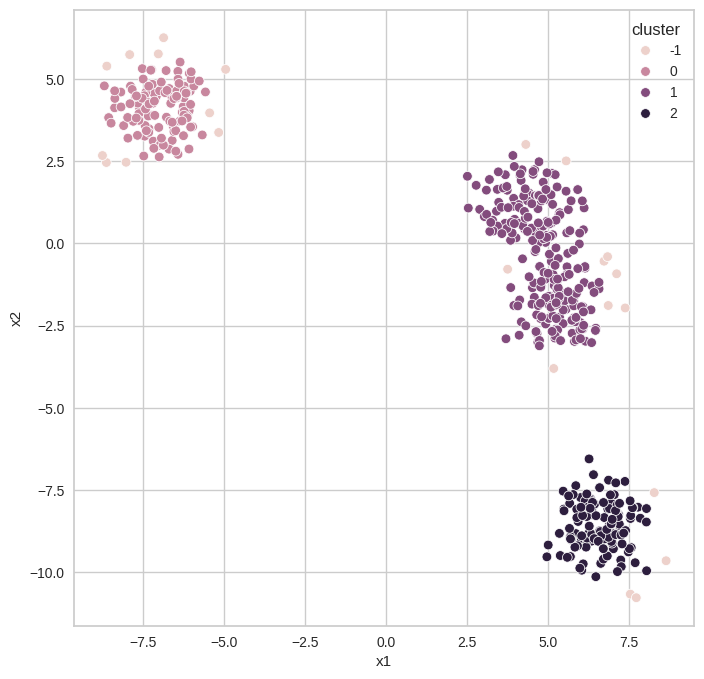

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

In [ ]:
#Hiperparametros
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

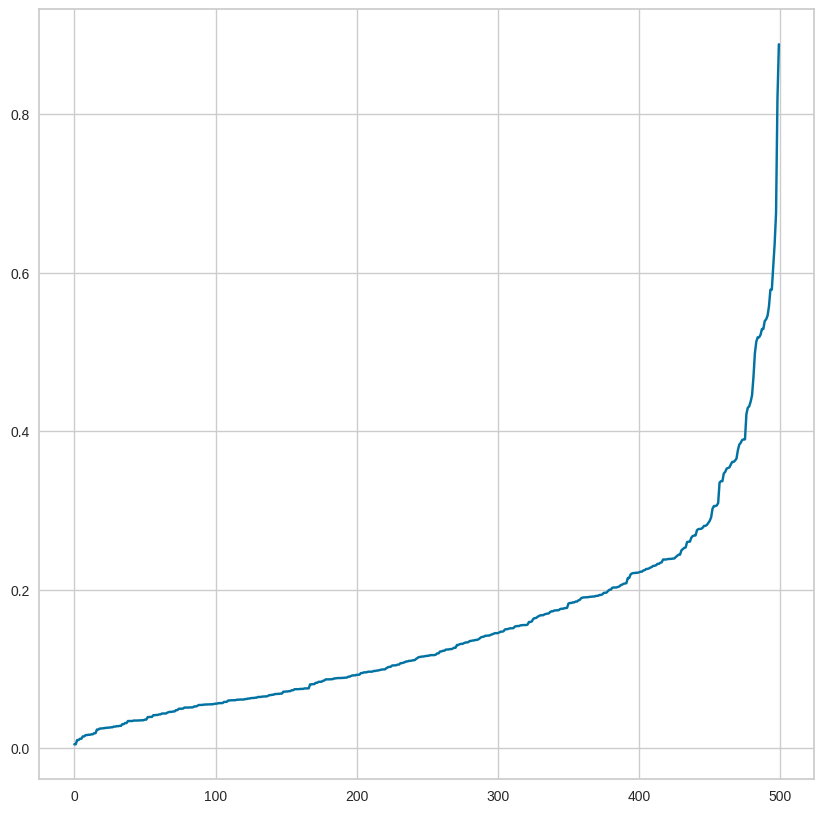

In [ ]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2,10)

In [ ]:
from itertools import product

In [ ]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []

for p in dbscan_paramns:
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))

In [ ]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [ ]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')

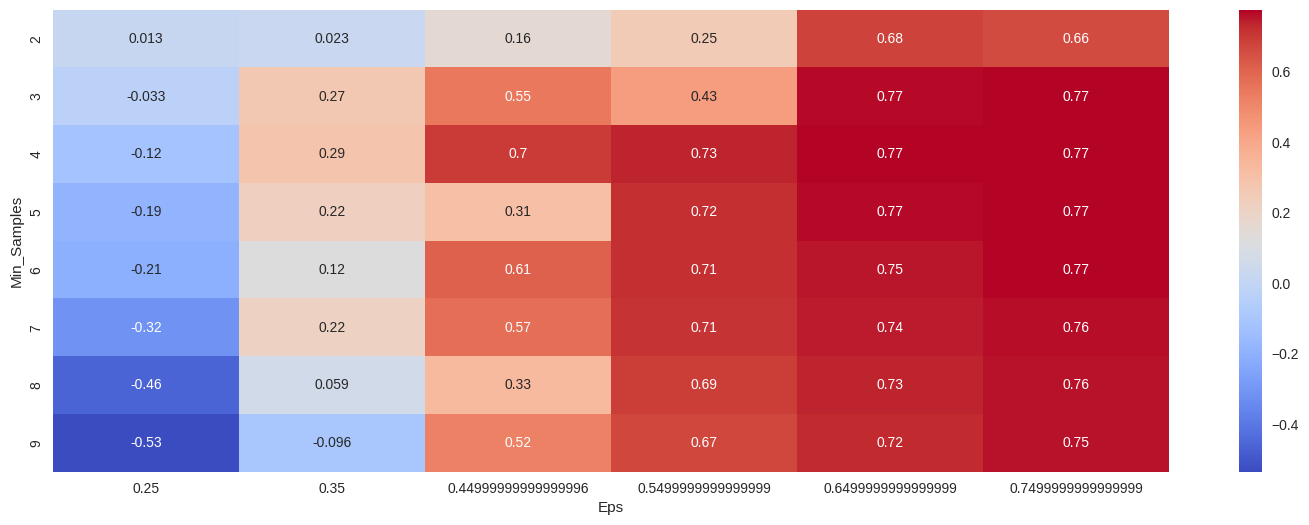

In [ ]:
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

In [ ]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

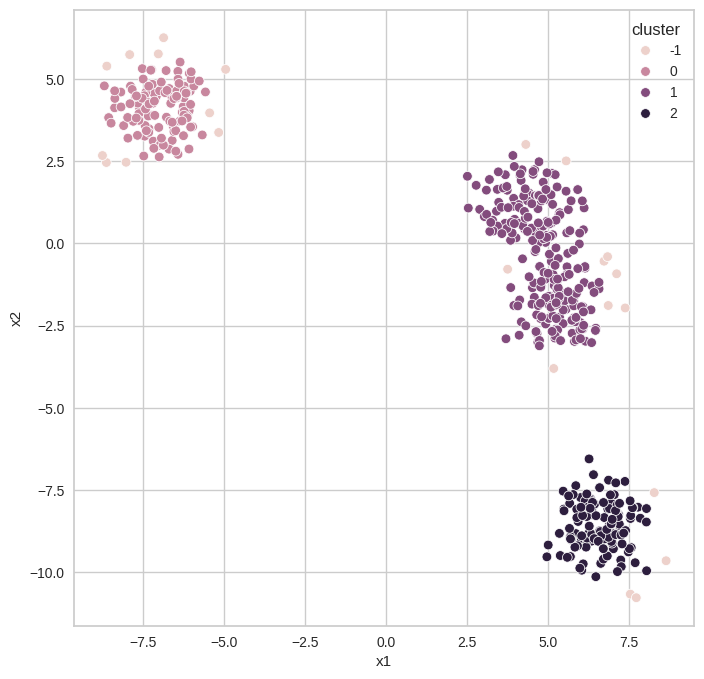

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.7114430221934508


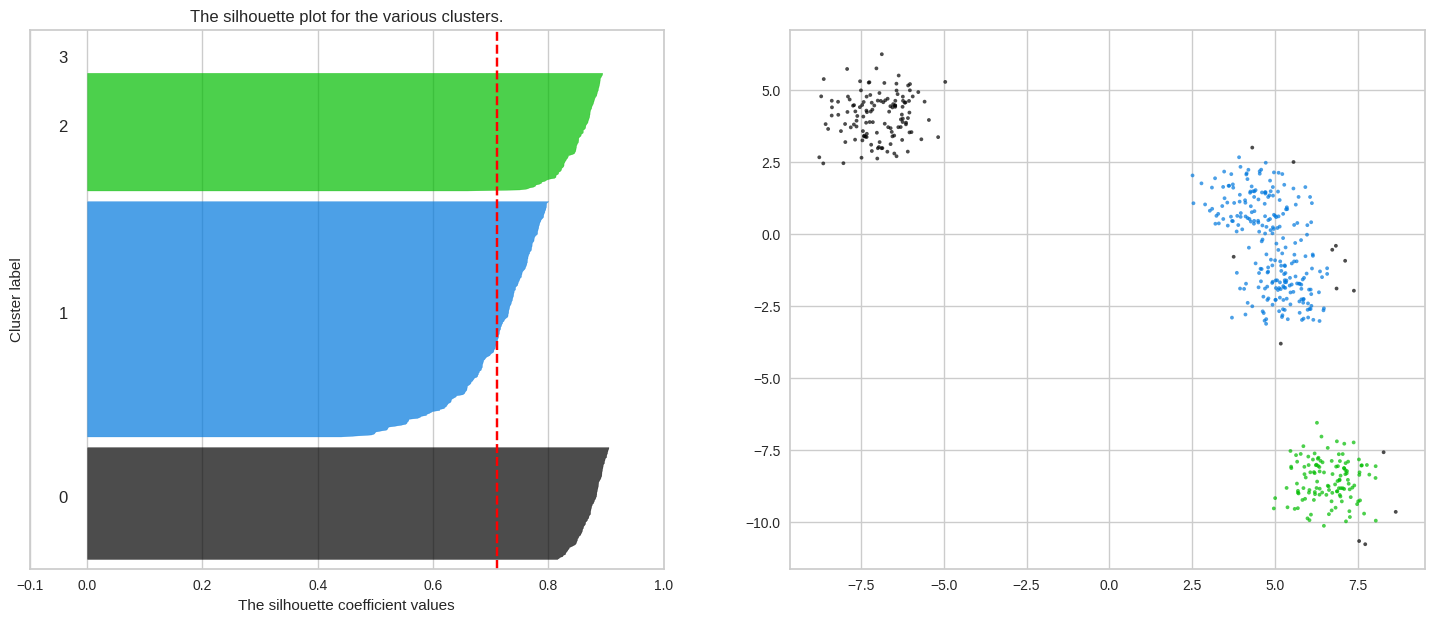

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()

In [ ]:
#PRUEBA CON DATA DE VERDAD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [ ]:
df_country = pd.read_csv('/content/Country-data.csv')

In [ ]:
df_country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
df_country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [ ]:
#Valores nulos
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
#Valores duplicados
df_country[df_country.duplicated()]

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []

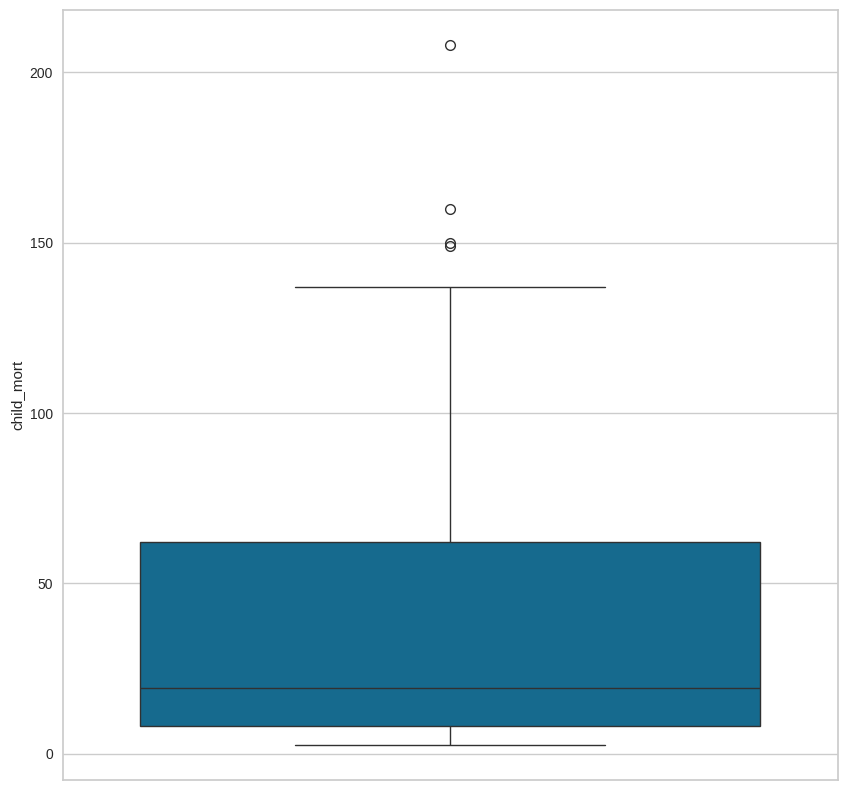

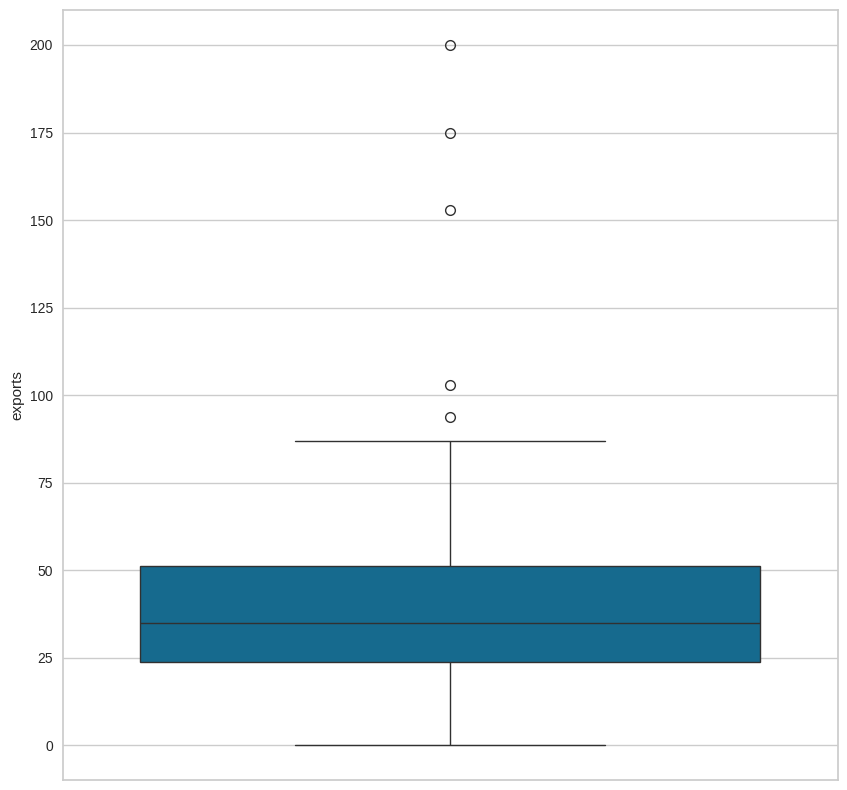

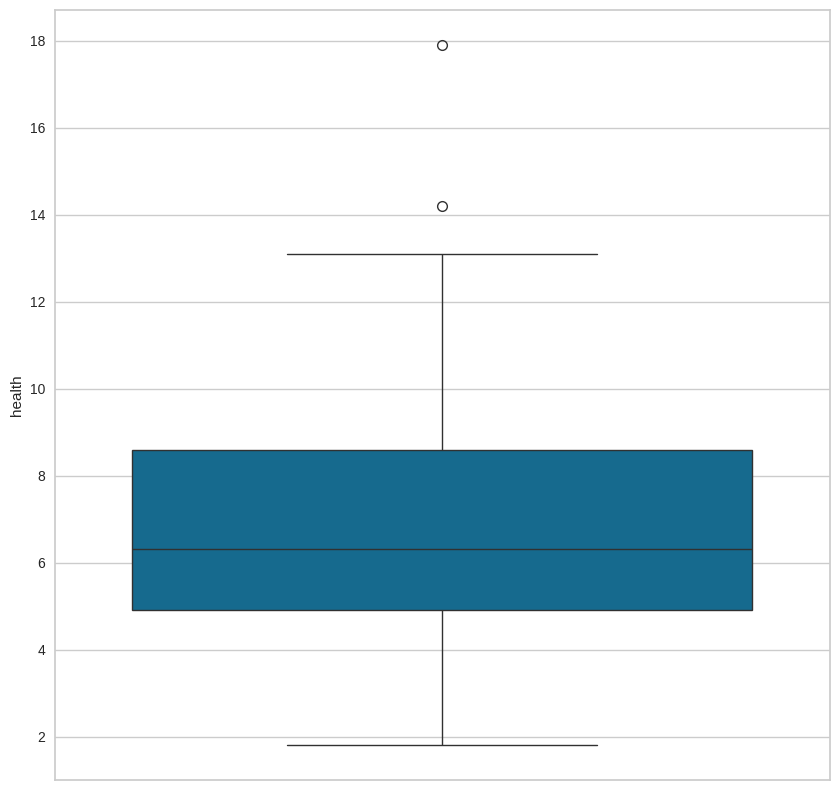

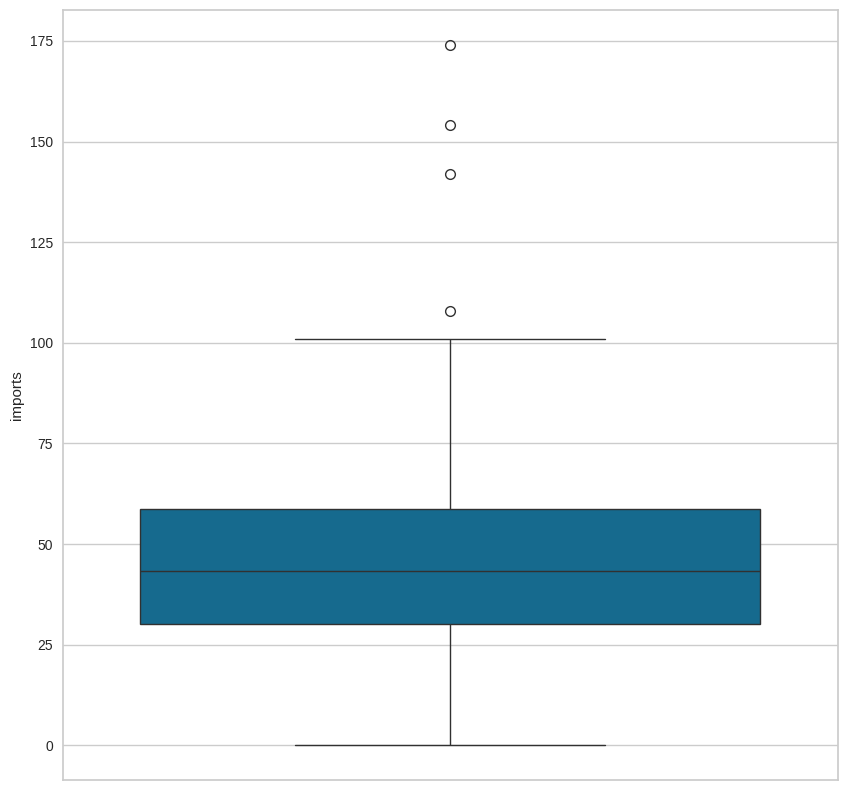

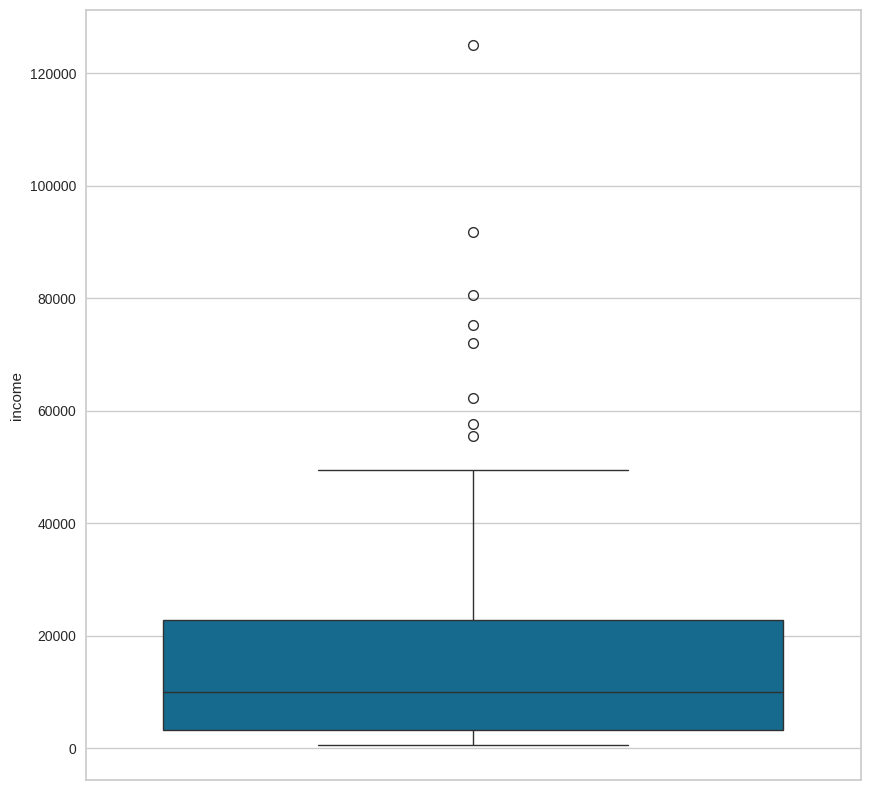

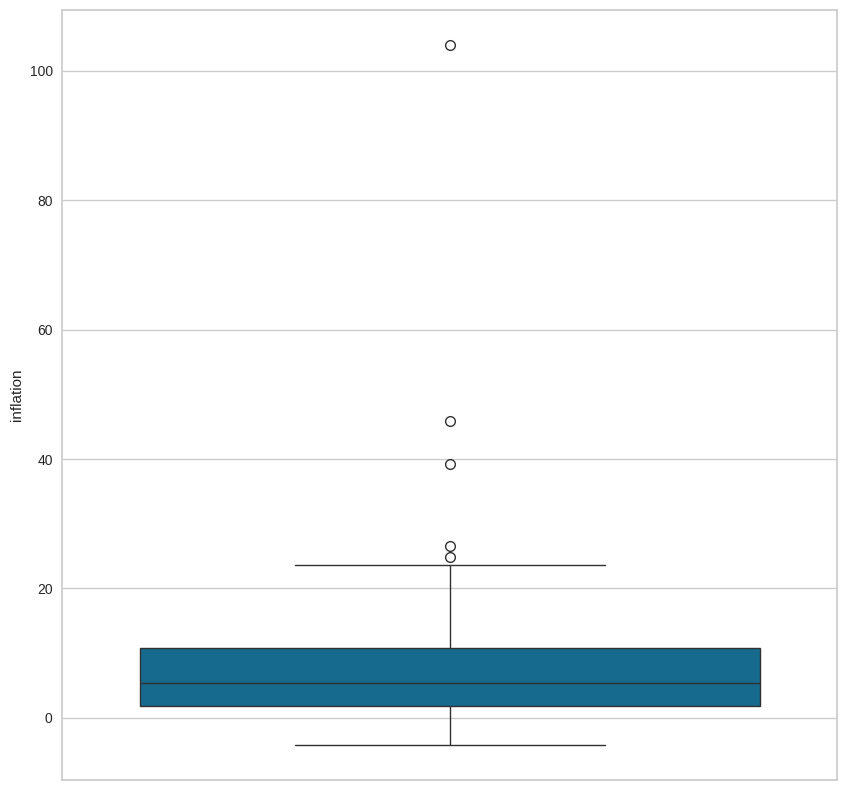

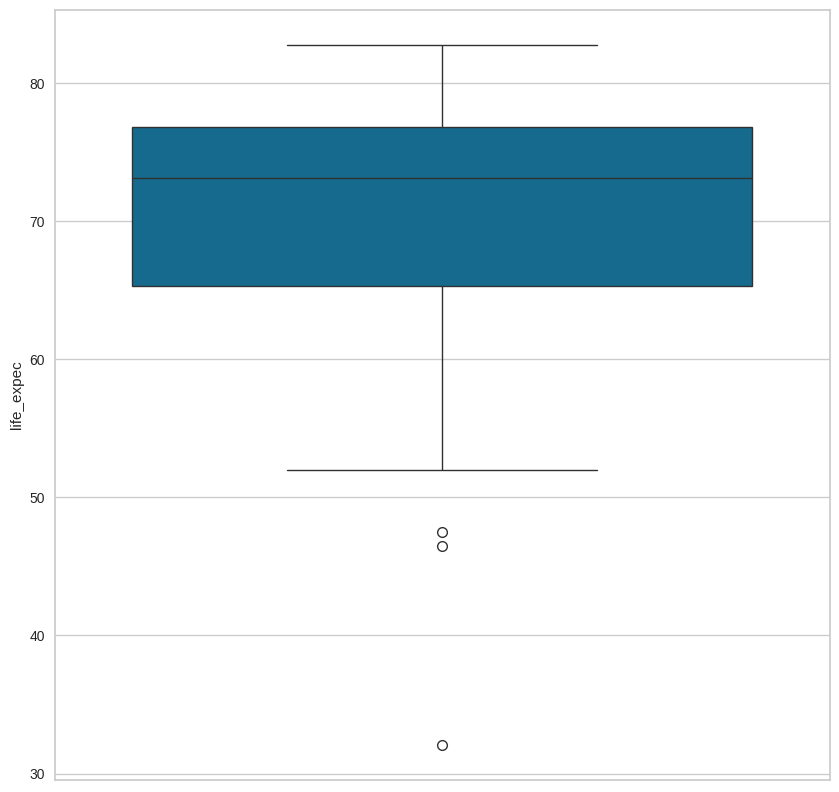

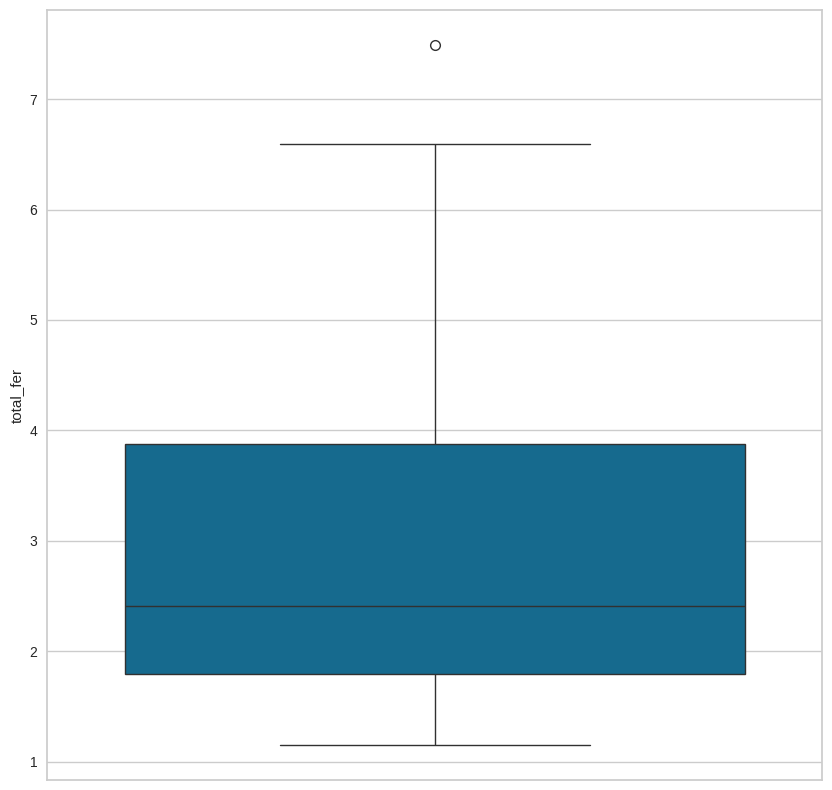

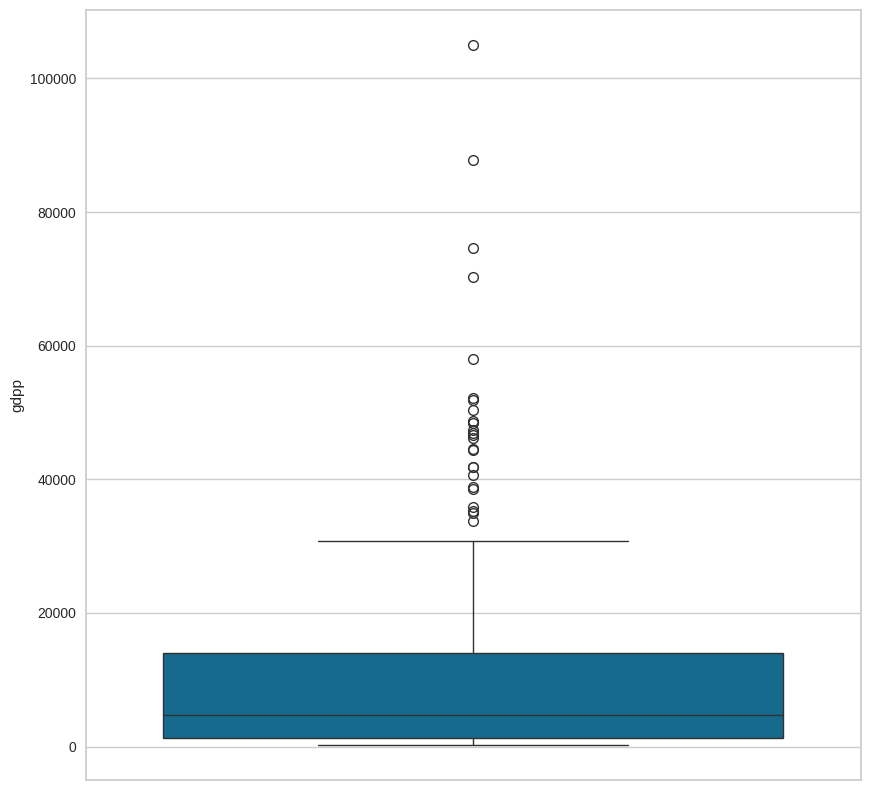

In [ ]:
#Analisis de distribucion
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_country_scaled = scaaler.fit_transform(df_country.drop('country',axis=1))

In [ ]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('country',axis=1).columns )

In [ ]:
df_country_scaled

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [ ]:
#Analisis factorial exploratorio por componentes principales o PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [ ]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


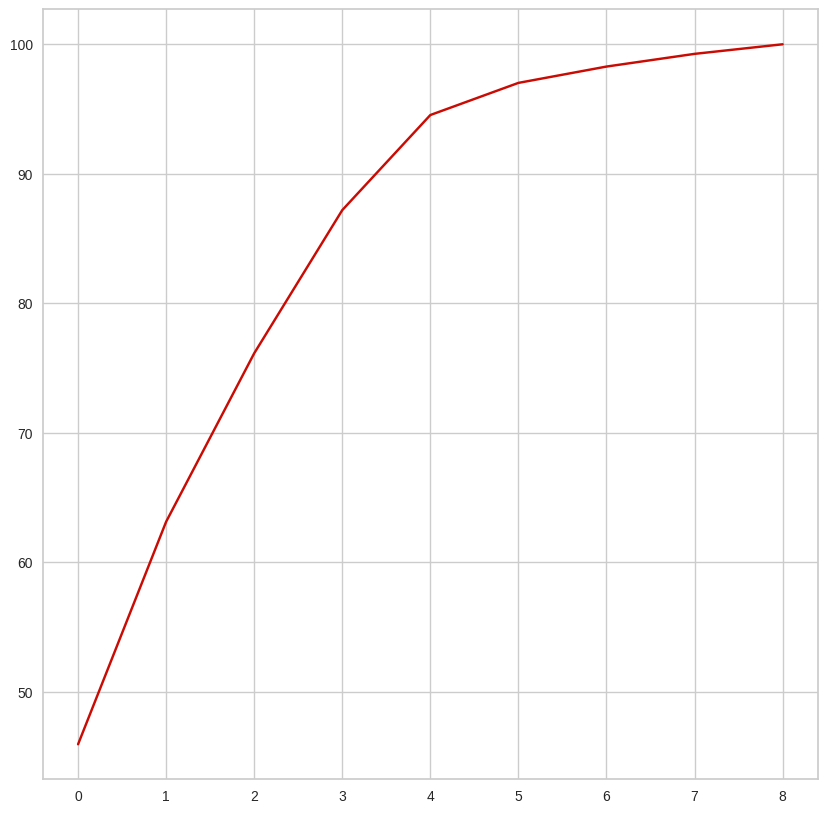

In [ ]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [ ]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

In [ ]:
pca_data_standard

0         1         2         3
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

In [ ]:
#Importar librerias para clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#KMEANS
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

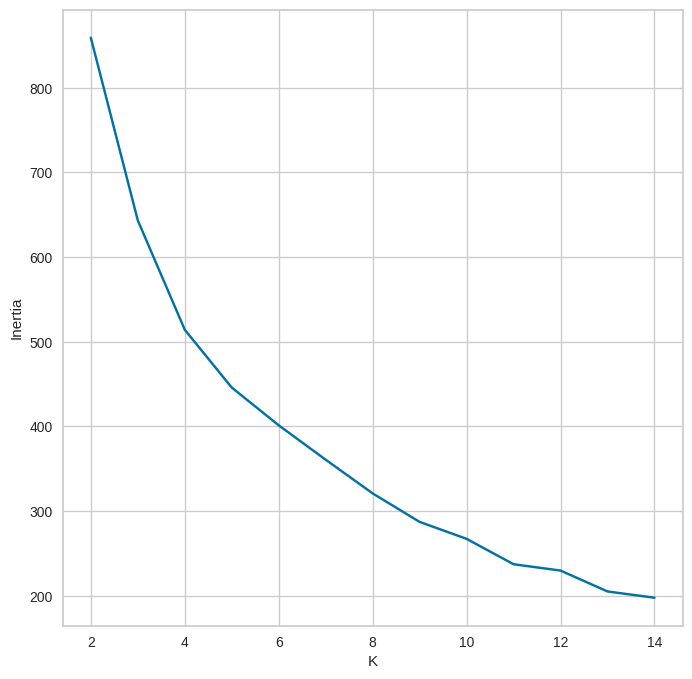

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

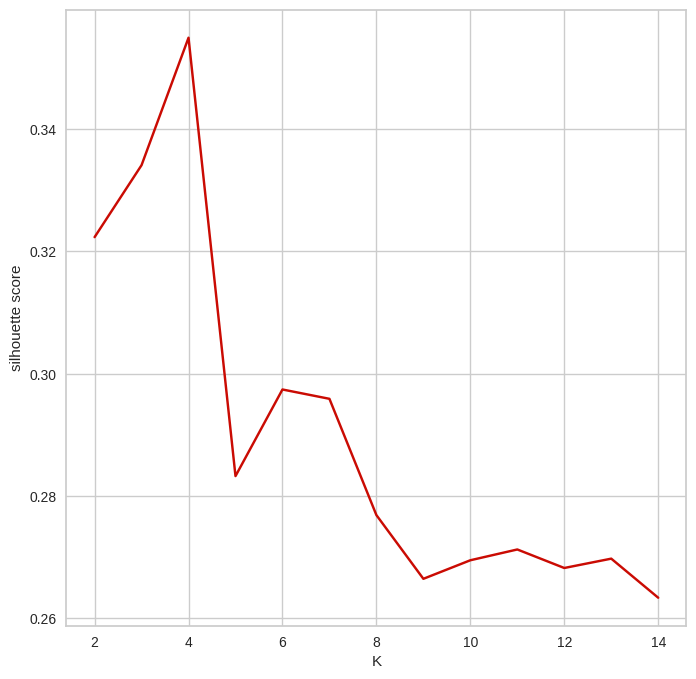

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.3519252676725516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#KMEANS SIN PCA
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

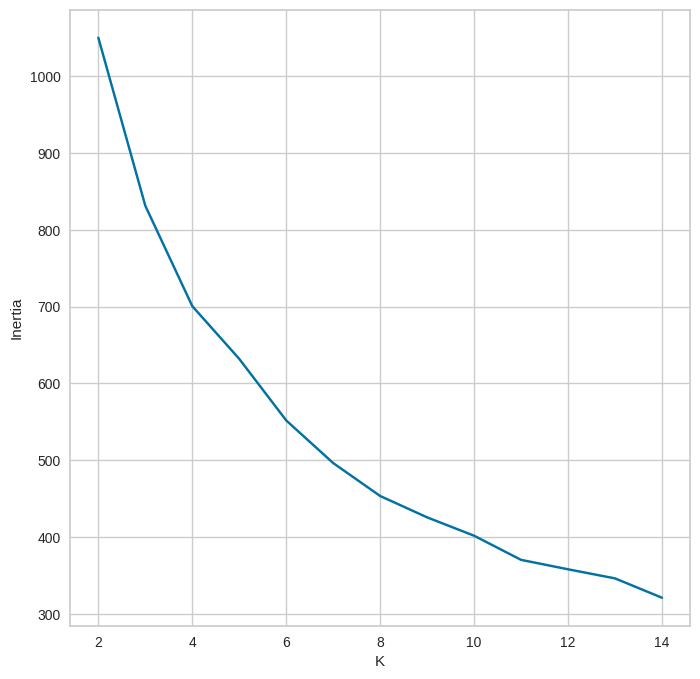

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

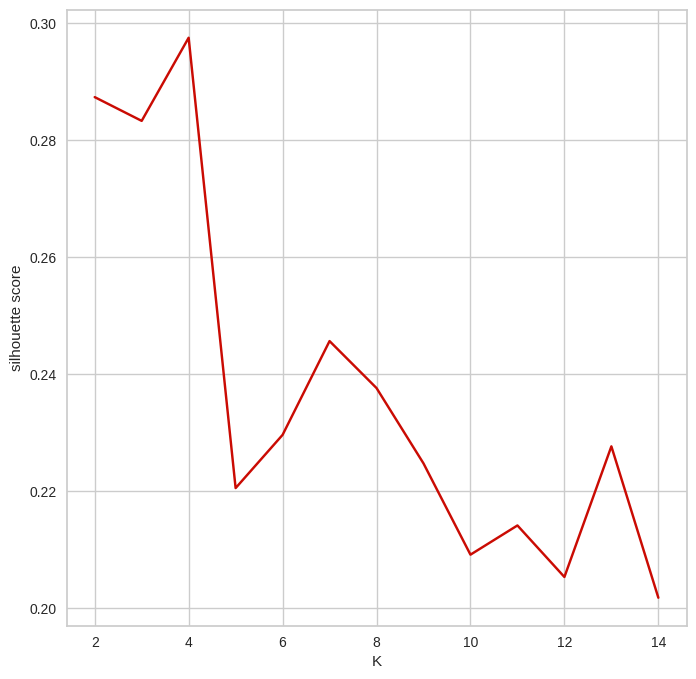

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.30088229124112015


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


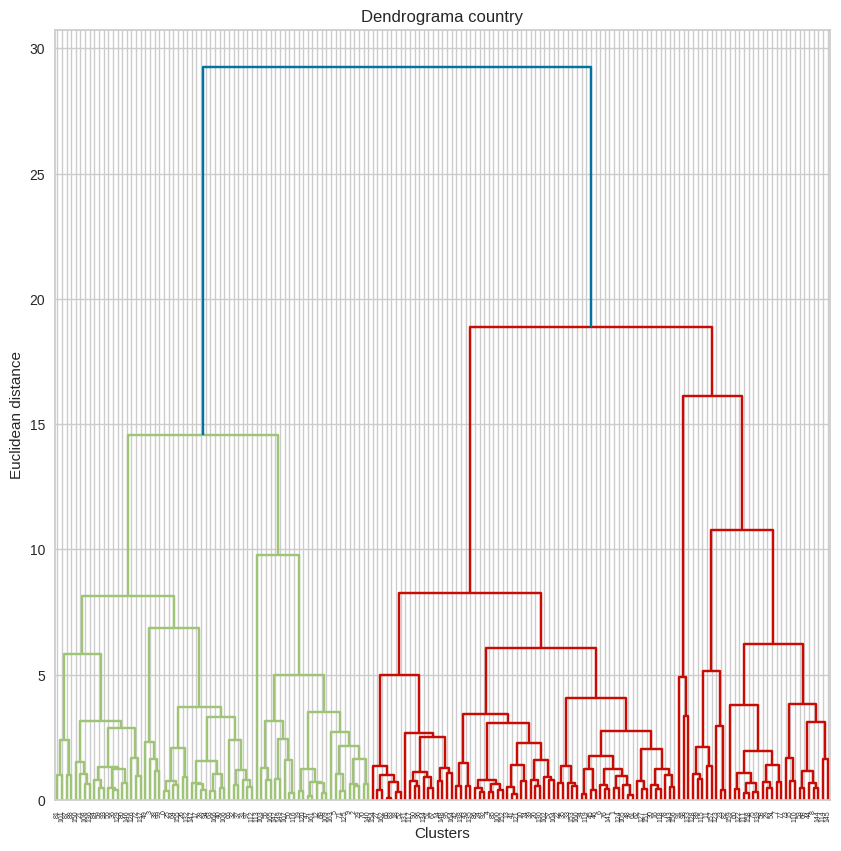

In [ ]:
#CLUSTER JERARQUICO con PCA
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc ))
df_country['hc_pca'] = y_hc

0.3070110704080526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


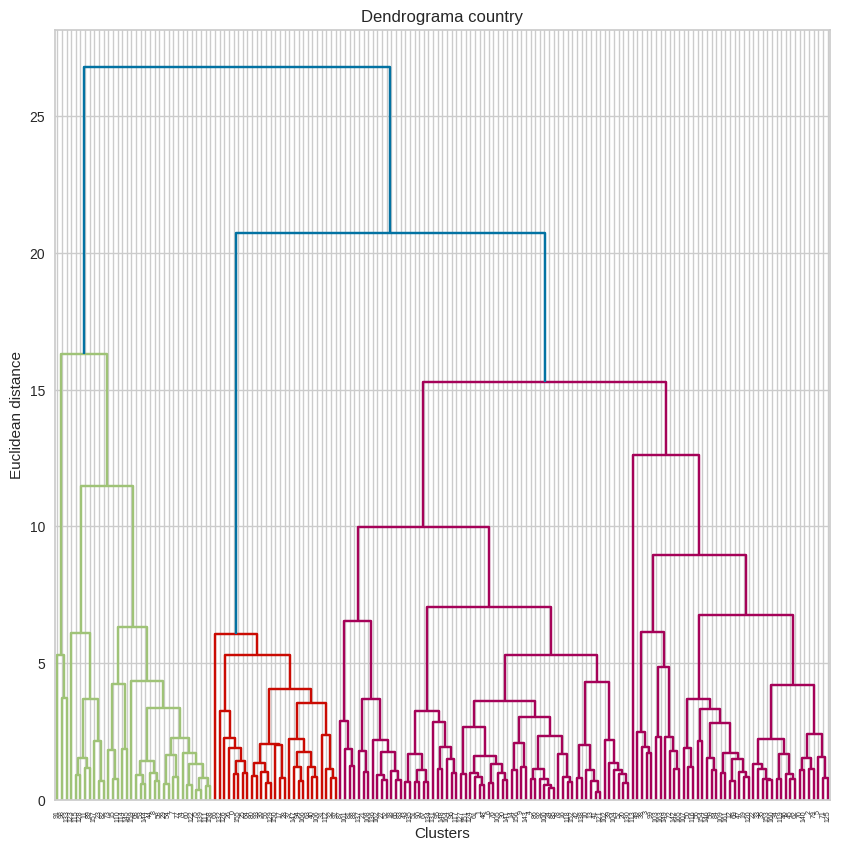

In [ ]:
#CLUSTER JERARQUICO sin PCA
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

0.3153134331018189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#DBSCAN con PCA
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

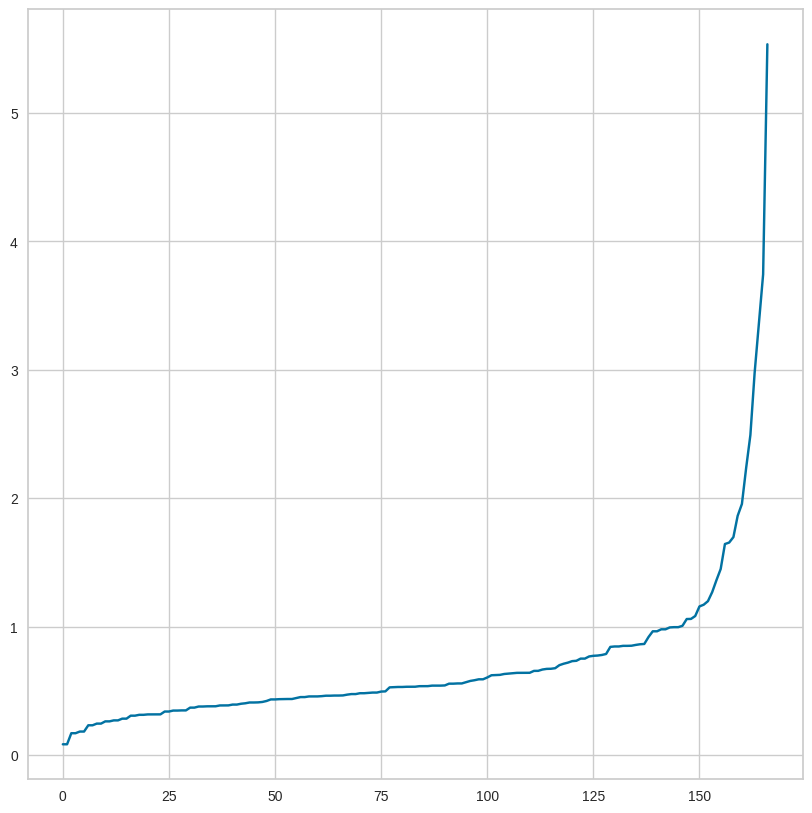

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12)

In [ ]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [ ]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

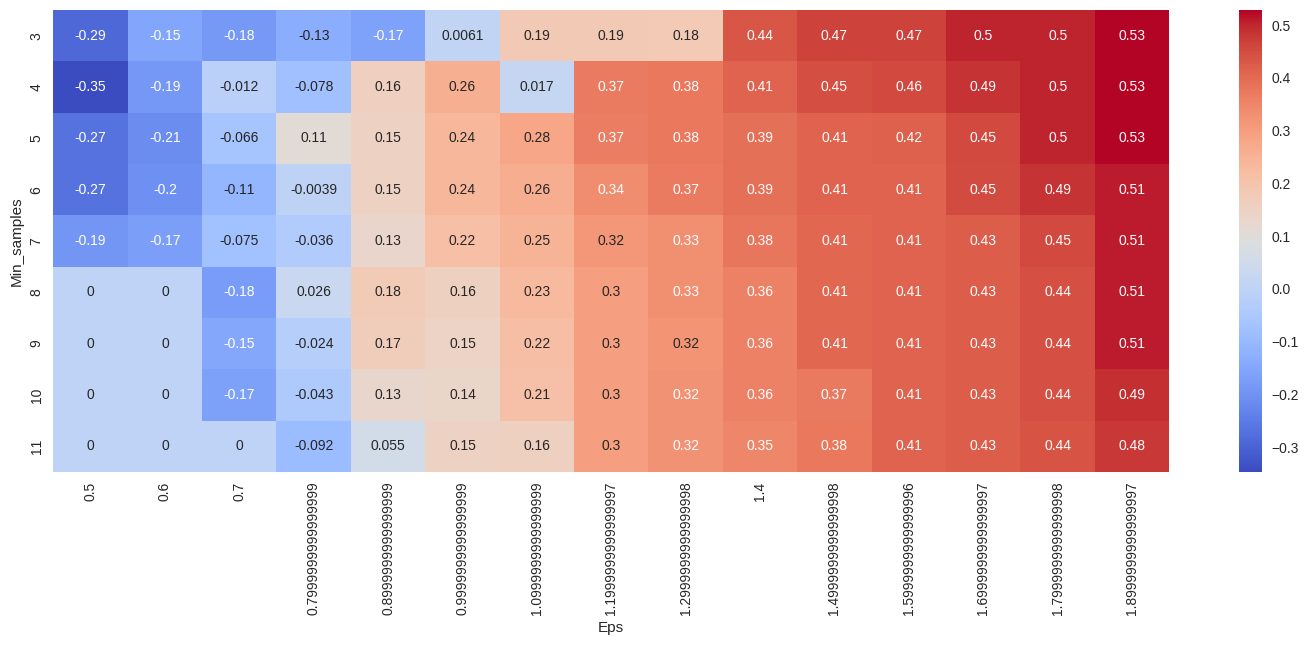

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

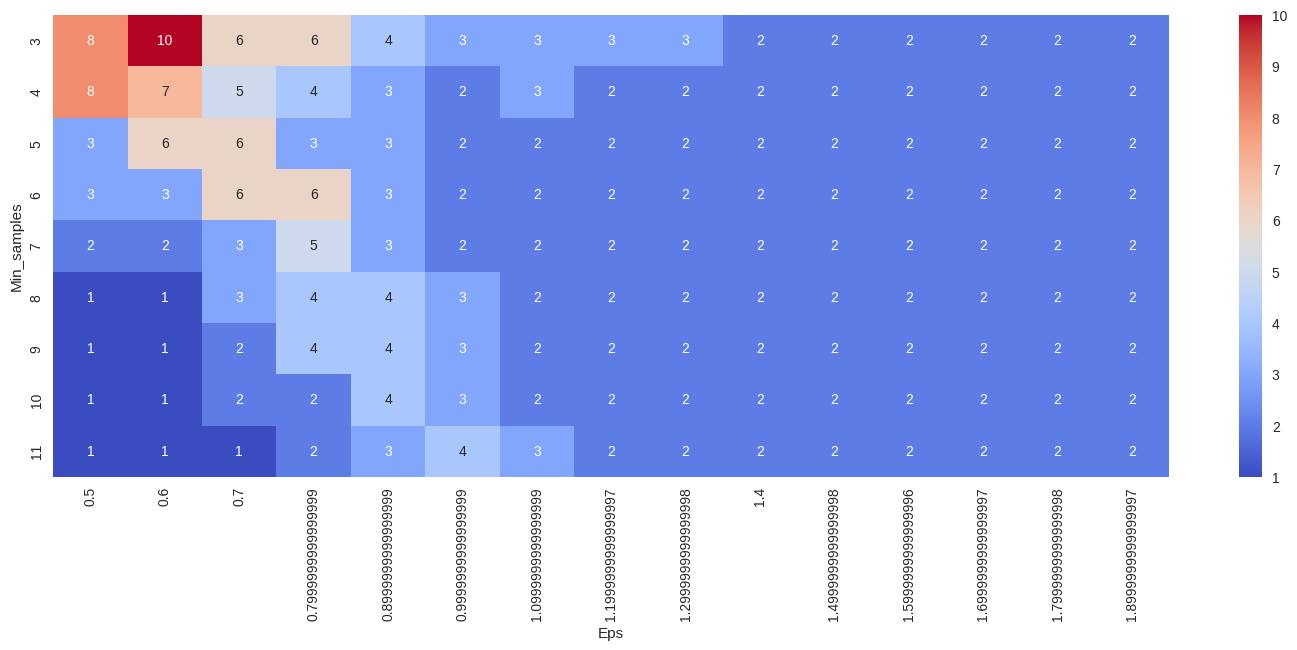

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

0.18591175730784343


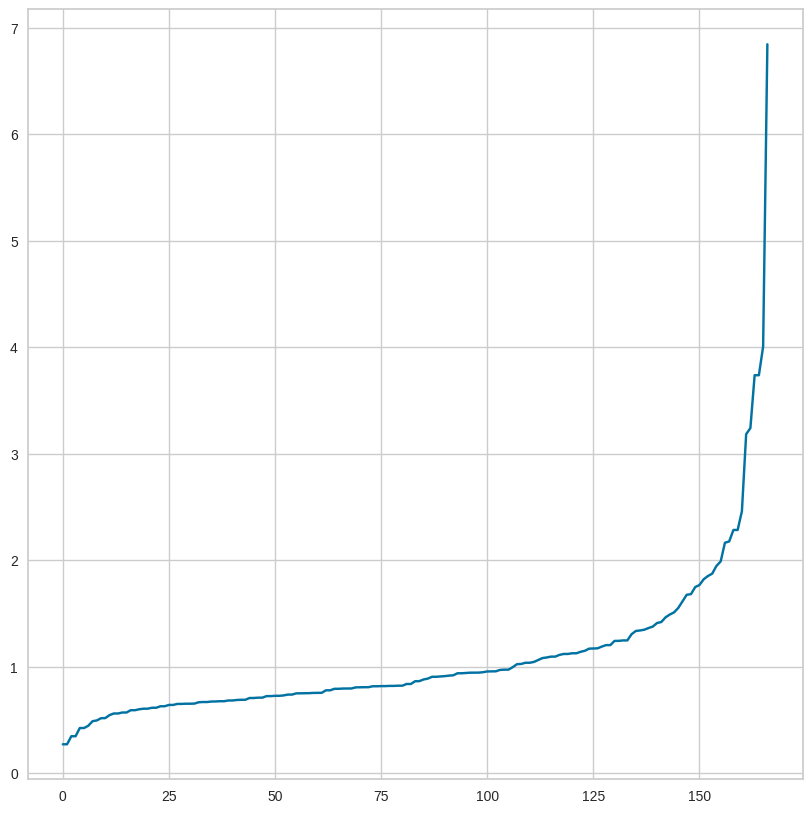

In [ ]:
#DBSCAN sin PCA
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [ ]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

In [ ]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [ ]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

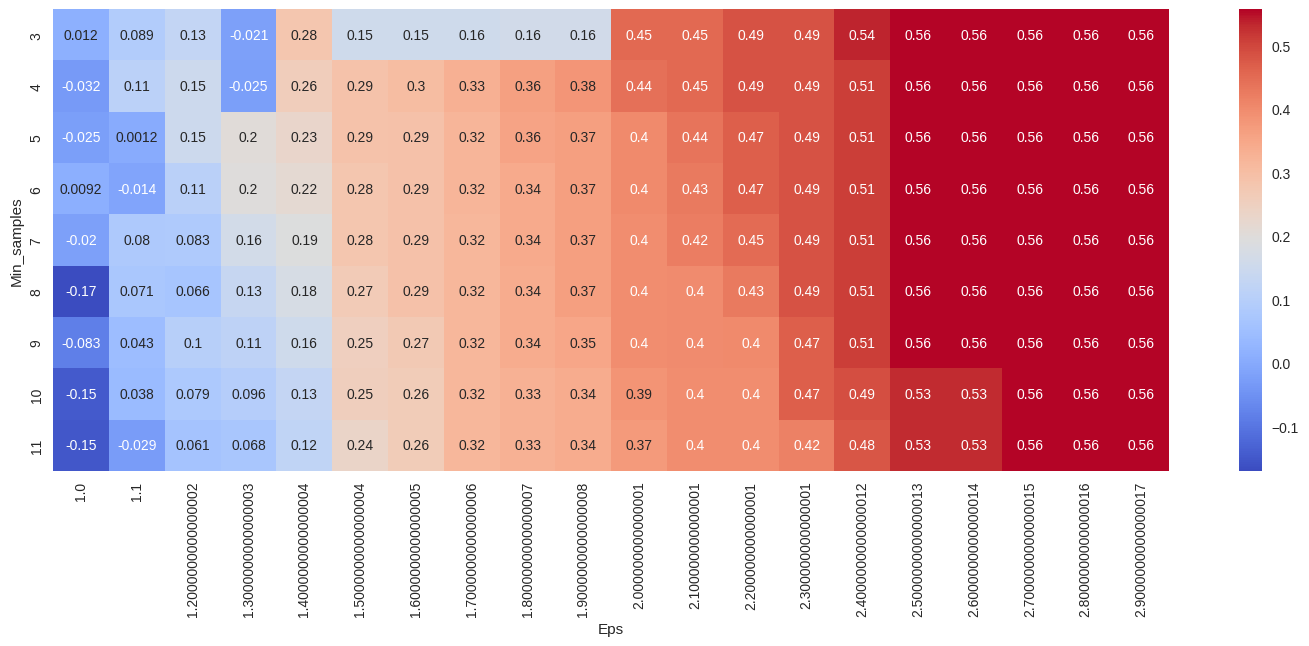

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

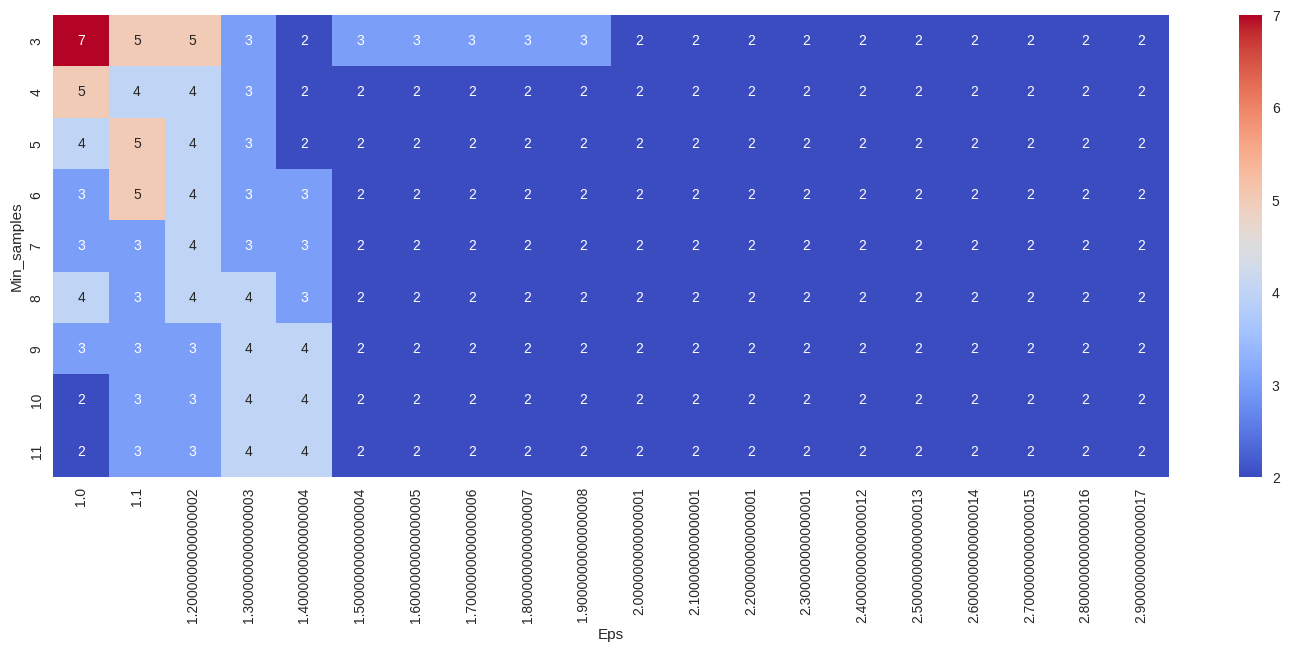

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


In [ ]:
df_country

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  k_means_pca  k_means  hc_pca  \
0         9.44        56.2       5.82    553            2        0       1   
1         4.49        76.3       1.65   4090            1        2       0   
2        16.10        76.5       2.89   4460            1        2       1   
3        22.40        60.1       6.16   3530            2        0       1   
4         1.44        76.8       2.13  12200            1        2       0   
..         ...         ...        ...    ...          ...      ...     ...   
162       2.62        63.0       3.50   2970            1        2       0   
163      45.90        75.4       2.47  13500            1        2       1   
164      12.10        73.1       1.95   1310            1        2       0   
165      23.60        67.5       4.67   1310            2        0       1   
166      14.00        52.0       5.40   1460            2        0       1   

     hc  dbscan_pca  dbscan_cluster  
0     0           0               0  
1     0           0               0  
2     0           0               0  
3     0          -1               0  
4     0           0               0  
..   ..         ...             ...  
162   0           0               0  
163   0          -1              -1  
164   0           0               0  
165   0           0               0  
166   0           0               0  

[167 rows x 16 columns]

In [ ]:
#Evaluacion de resultados
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [ ]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  k_means_pca  
0         5.82    553            2  
1         1.65   4090            1  
2         2.89   4460            1  
3         6.16   3530            2  
4         2.13  12200            1  
..         ...    ...          ...  
162       3.50   2970            1  
163       2.47  13500            1  
164       1.95   1310            1  
165       4.67   1310            2  
166       5.40   1460            2  

[167 rows x 10 columns]

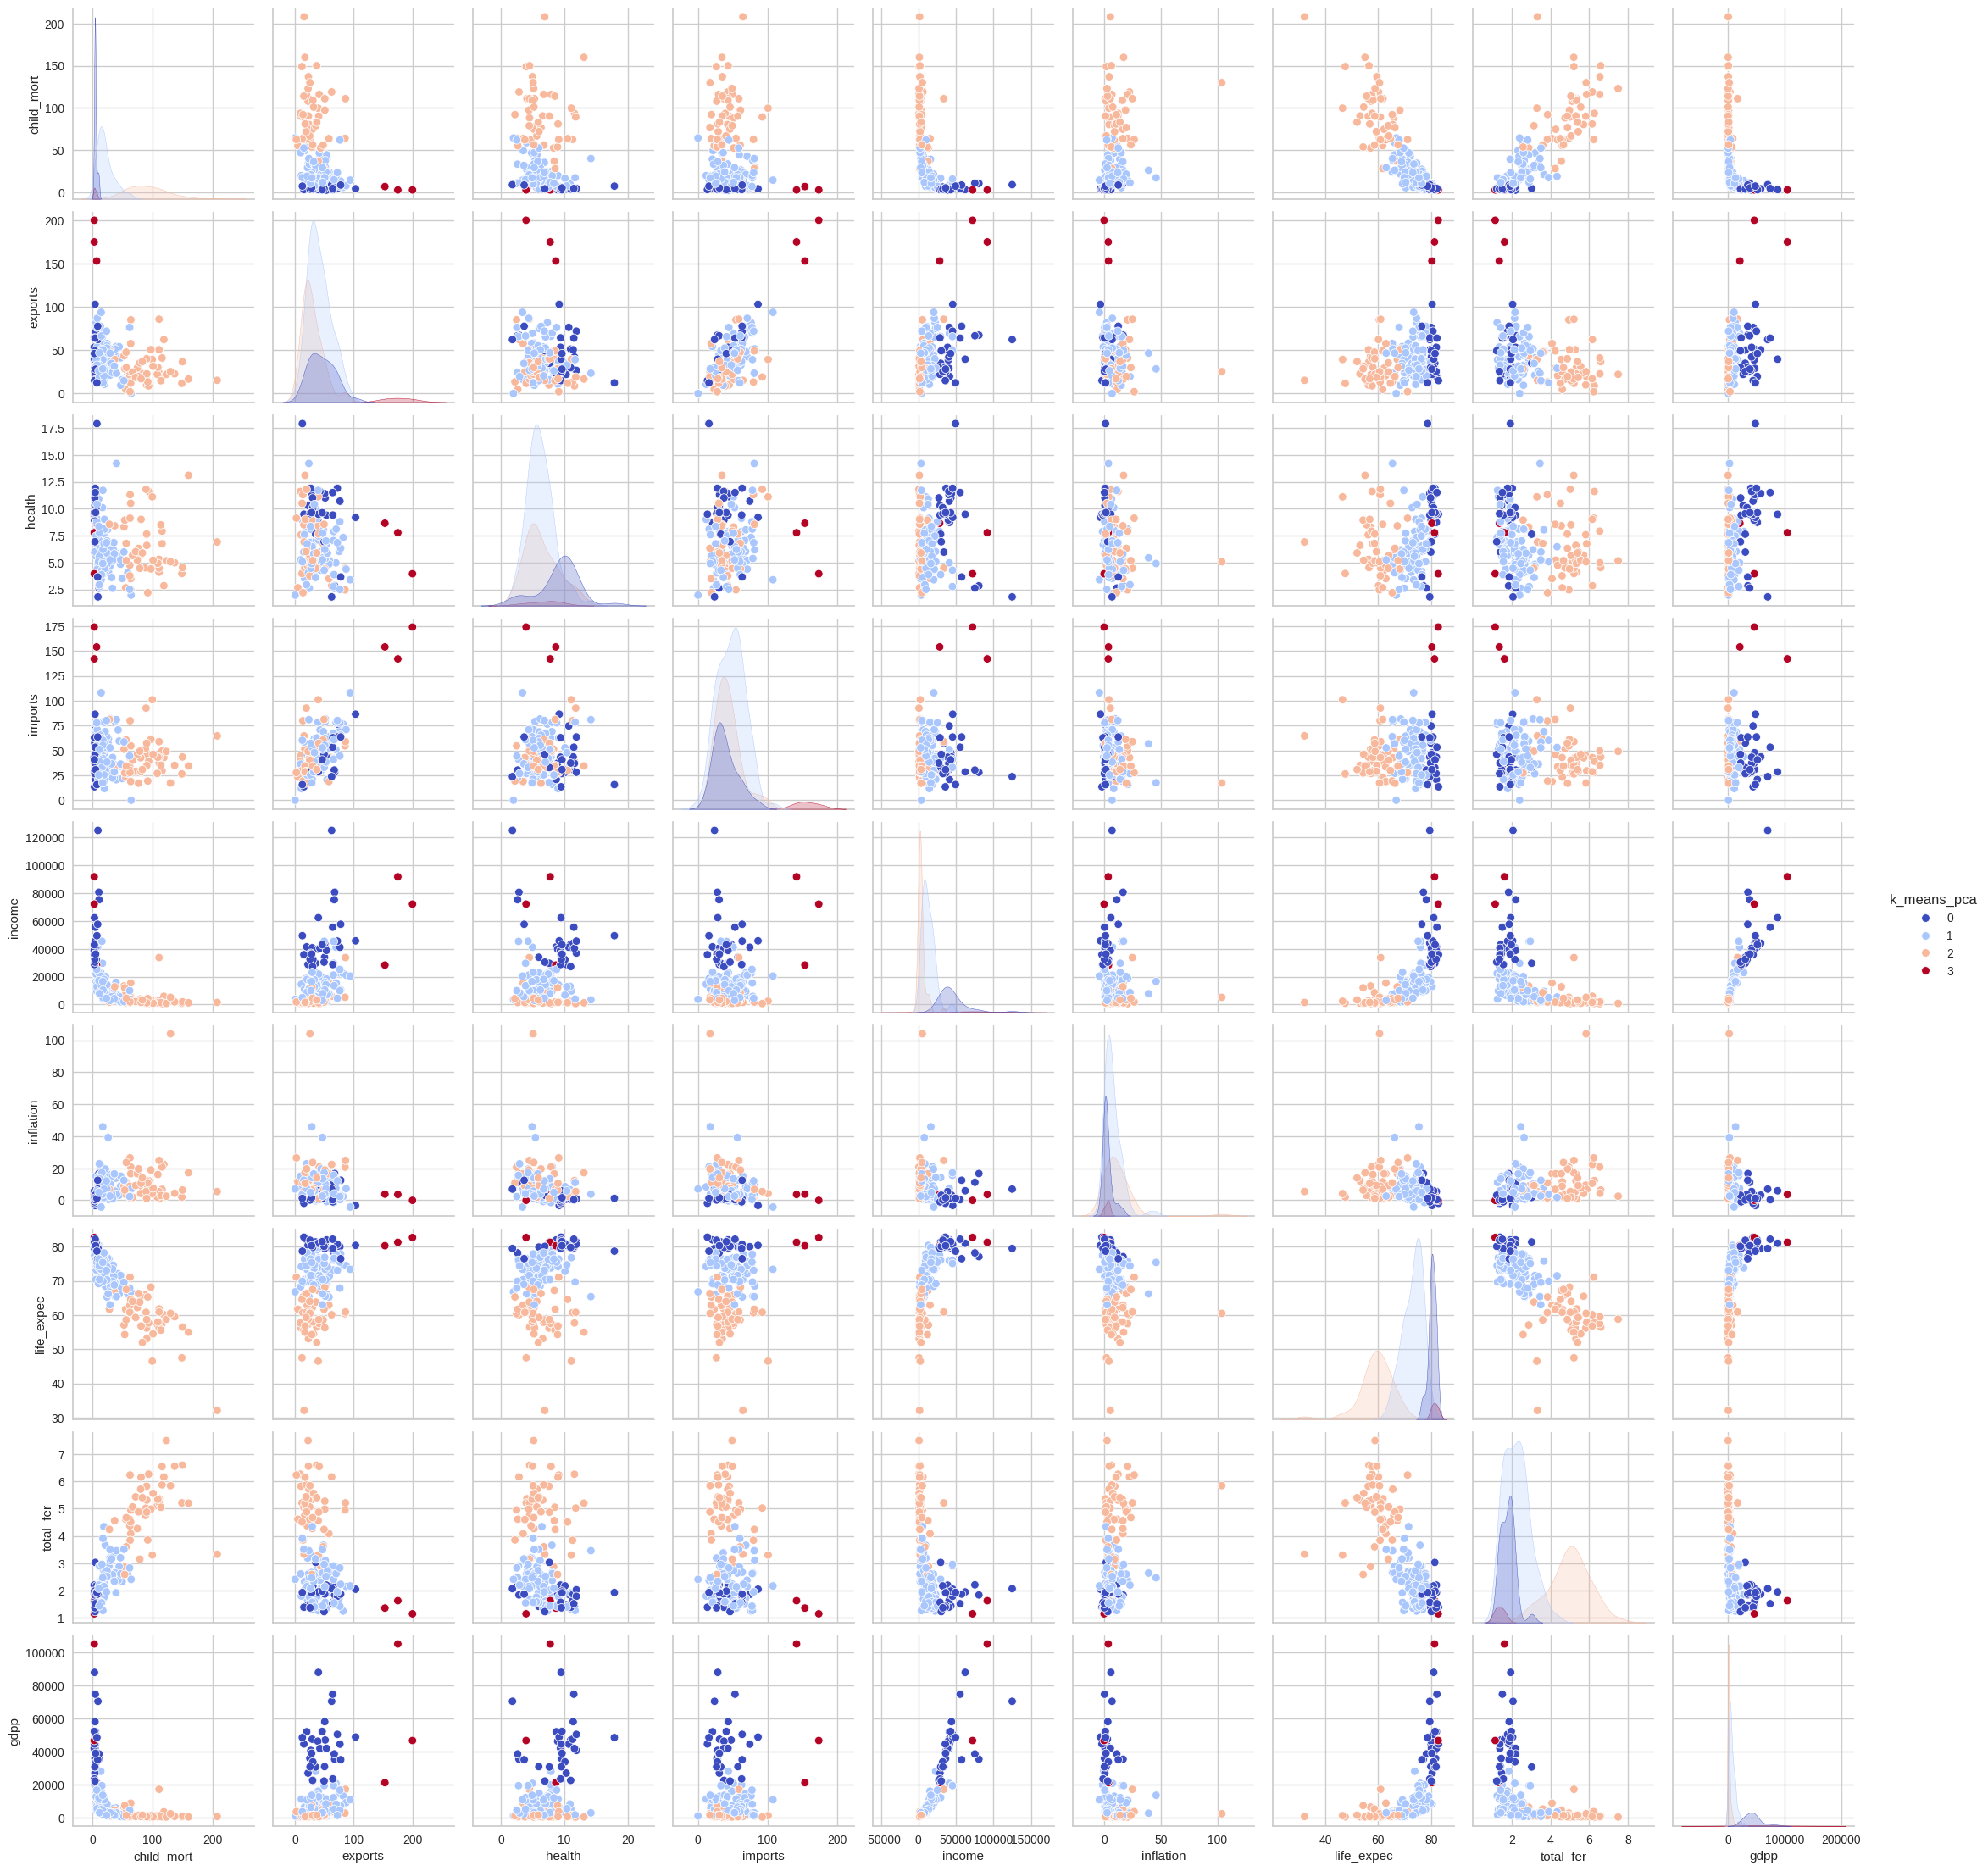

In [ ]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

In [ ]:
df_country

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

In [ ]:
df_country[df_country['k_means_pca']==3]

In [ ]:
df_country[df_country['k_means_pca']==2]